# Planteamiento de un storytelling con datos

**Descripción del laboratorio**

En esta actividad se pondrá en práctica las primeras etapas de una narrativa efectiva basada en datos. Se Deberá generar un informe con el planteamiento de una idea que cuente una historia utilizando un conjunto de datos real o ficticio y combinando técnicas y habilidades de análisis de datos.

# Objetvios

* **Definir el objetivo:** dependiendo del tema elegido debes definir claramente el propósito de tu historia, ¿cuál es el mensaje que deseas transmitir?, ¿qué es lo que deseas demostrar?

* **Identificar la audiencia:** debes definir a quien va dirigida tu historia, quienes son los interesados en escuchar y en entender lo que quieres transmitir.

* **Recolección de datos:** identifica las fuentes de donde obtendrás los datos y realiza un análisis preliminar de ellos, identifica cuales son los datos que tienen relevancia para tu estudio y cuáles no.

* **Realizar el análisis:** define qué tipo de análisis es el adecuado para tu estudio y justifica tu elección.

# Importacion de librerias

Iniciamos realizando la importación de algunas de las librerías necesarias para trabajar

In [1]:
#%pip install missingno
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder

from scipy.stats import chi2_contingency, spearmanr

Posteriormente, importamos el conjunto de datos que utilizaremos

In [2]:
df = pd.read_csv('Saber_11__2019.csv')

C:\Users\Hector\AppData\Local\Temp\ipykernel_4392\1764741892.py:1: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Saber_11__2019.csv')


# Información de las Variables

Revisamos la información cargada es el DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 82 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             546212 non-null  object 
 1   ESTU_NACIONALIDAD              546212 non-null  object 
 2   ESTU_GENERO                    546212 non-null  object 
 3   ESTU_FECHANACIMIENTO           546212 non-null  object 
 4   PERIODO                        546212 non-null  int64  
 5   ESTU_CONSECUTIVO               546212 non-null  object 
 6   ESTU_ESTUDIANTE                546212 non-null  object 
 7   ESTU_TIENEETNIA                546212 non-null  object 
 8   ESTU_PAIS_RESIDE               546212 non-null  object 
 9   ESTU_ETNIA                     546212 non-null  object 
 10  ESTU_DEPTO_RESIDE              545835 non-null  object 
 11  ESTU_COD_RESIDE_DEPTO          546212 non-null  object 
 12  ESTU_MCPIO_RESIDE             

Aquí observamos de manera general:
 * El número de filas totales = 546212
 * La cantidad de variables = 82

y para cada variable la cantidad de datos no nulos y el tipo de dato

También podemos observar la información estadística de las variables numéricas en el conjunto de datos de la siguiente manera

In [5]:
df.describe()

,PERIODO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,...,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO
count,546212.0,546212.000000,5.462120e+05,5.462120e+05,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,...,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546193.000000,546212.000000,546212.000000,546168.000000
mean,20194.0,197397.840712,2.038424e+11,2.044208e+11,32755.704584,32.516563,32723.924917,32.503804,52.157305,50.111151,...,48.234779,50.157646,2.020730,46.224589,50.179648,1.901584,48.416891,50.098669,246.186464,2.376862
std,0.0,229636.502160,9.221826e+10,9.302404e+10,26364.009436,26.340054,26425.441138,26.399203,10.537963,28.959257,...,10.764035,28.935705,0.761262,12.140588,28.911682,0.820178,12.558438,28.917401,51.386858,0.686206
min,20194.0,75.000000,1.050010e+11,1.050010e+11,5001.000000,5.000000,5001.000000,5.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,20194.0,45732.000000,1.170500e+11,1.171740e+11,11001.000000,11.000000,11001.000000,11.000000,45.000000,25.000000,...,40.000000,25.000000,1.000000,37.000000,25.000000,1.000000,39.000000,25.000000,207.000000,2.000000
50%,20194.0,113076.000000,1.732085e+11,1.733190e+11,20750.000000,20.000000,20250.000000,20.000000,52.000000,50.000000,...,48.000000,50.000000,2.000000,45.000000,50.000000,2.000000,48.000000,50.000000,243.000000,2.000000
75%,20194.0,194779.000000,3.050010e+11,3.050010e+11,54001.000000,54.000000,54001.000000,54.000000,60.000000,75.000000,...,56.000000,75.000000,3.000000,55.000000,75.000000,2.000000,56.000000,75.000000,282.000000,3.000000
max,20194.0,728303.000000,8.548740e+11,8.548740e+11,99773.000000,99.000000,99773.000000,99.000000,100.000000,100.000000,...,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,477.000000,4.000000


Podemos encontrar valores como la media, desviación estándar, valor mínimo y máximo y algunos percentiles, esto de manera general nos muestra más información acerca del conjunto de datos

# Eliminacion de variables

Se procede a eliminar las variables que no son relevantes para el estudio

In [3]:
df2 = df.drop(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA', 'ESTU_COD_RESIDE_DEPTO',
                                'ESTU_COD_RESIDE_MCPIO', 'FAMI_CUARTOSHOGAR', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
                                'FAMI_TIENEMOTOCICLETA', 'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',
                                'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_NATURALEZA', 'COLE_BILINGUE', 'COLE_COD_DANE_SEDE', 'COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL', 'COLE_COD_MCPIO_UBICACION',
                                'COLE_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION',
                                'ESTU_DEPTO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 'PERCENTIL_MATEMATICAS',
                                'DESEMP_MATEMATICAS', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES', 'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PERCENTIL_INGLES',
                                'DESEMP_INGLES', 'PERCENTIL_GLOBAL', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_ESTADOINVESTIGACION','ESTU_GENERACION-E',
                                'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES'], axis=1)

# Datos Faltantes

Debido a que hay datos faltantes en nuestro conjunto de datos, debemos asegurarnos que este debe estar en un formato que sea reconocido, lo hacemos de la siguiente manera

In [7]:
(
    df2
    .replace(
        to_replace=["NaN", "NA", "n/a"],
        value=np.nan
    )
)

,ESTU_GENERO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,...,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_CALENDARIO,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL
0,M,No,MAGDALENA,SANTA ANA,Estrato 3,5 a 6,Educación profesional completa,Secundaria (Bachillerato) completa,Si,Si,...,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,INSTITUCION EDUCATIVA DEPARTAMENTAL ANTONIO BR...,MIXTO,A,TÉCNICO/ACADÉMICO,URBANO,MAÑANA,208
1,M,No,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,9 o más,Técnica o tecnológica completa,Técnica o tecnológica completa,Si,Si,...,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,GIMN SAN ANGELO,MIXTO,A,ACADÉMICO,URBANO,COMPLETA,299
2,M,No,BOLIVAR,CARTAGENA DE INDIAS,Estrato 1,5 a 6,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,Si,...,Entre 30 y 60 minutos,Más de 3 horas,0,INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,MIXTO,A,TÉCNICO/ACADÉMICO,URBANO,MAÑANA,299
3,M,Si,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,3 a 4,Primaria incompleta,Secundaria (Bachillerato) completa,No,No,...,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,COLEGIO VIRGINIA GUTIERREZ DE PINEDA (IED),MIXTO,A,ACADÉMICO,URBANO,MAÑANA,309
4,M,No,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,3 a 4,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,Si,...,No leo por entretenimiento,Más de 3 horas,Más de 30 horas,COLEGIO PALERMO IEDIP (IED),MIXTO,A,TÉCNICO/ACADÉMICO,URBANO,MAÑANA,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546207,M,No,ANTIOQUIA,MARINILLA,Estrato 2,5 a 6,Primaria incompleta,Secundaria (Bachillerato) completa,Si,Si,...,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,I. E. SAN JOSE,MIXTO,A,TÉCNICO/ACADÉMICO,URBANO,MAÑANA,360
546208,M,No,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,5 a 6,No sabe,Primaria completa,Si,Si,...,No leo por entretenimiento,Más de 3 horas,0,GIMNASIO INGLES CAMPESTRE,MIXTO,A,ACADÉMICO,URBANO,COMPLETA,360
546209,M,No,ARAUCA,ARAUCA,Estrato 2,5 a 6,Postgrado,Técnica o tecnológica completa,Si,Si,...,30 minutos o menos,Entre 30 y 60 minutos,0,INSTITUCION EDUCATIVA SANTA TERESITA,MIXTO,A,TÉCNICO,URBANO,TARDE,377
546210,M,No,SANTANDER,VILLANUEVA,Estrato 1,3 a 4,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,Si,...,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,COLEGIO ELISEO PINILLA RUEDA,MIXTO,A,TÉCNICO/ACADÉMICO,URBANO,SABATINA,278


Una vez realizado este ajuste, verificamos nuevamente que variables tienen al menos un dato faltante

In [8]:
(
    df2
    .isnull()
    .sum()
    .sort_values(ascending=False)
    .head(17)
)

ESTU_DEDICACIONINTERNET         30298
FAMI_TIENESERVICIOTV            22280
FAMI_EDUCACIONMADRE             20959
COLE_CARACTER                   13748
FAMI_NUMLIBROS                   8654
FAMI_PERSONASHOGAR               8463
FAMI_TIENEINTERNET               8337
FAMI_EDUCACIONPADRE              8292
FAMI_SITUACIONECONOMICA          8259
FAMI_TIENECOMPUTADOR             8185
FAMI_TIENECONSOLAVIDEOJUEGOS     7725
ESTU_DEDICACIONLECTURADIARIA      627
ESTU_HORASSEMANATRABAJA           381
ESTU_MCPIO_RESIDE                 377
ESTU_DEPTO_RESIDE                 377
FAMI_ESTRATOVIVIENDA               26
COLE_CALENDARIO                     0
dtype: int64

Hay una gran cantidad de datos faltantes, quedando la proporción de datos faltantes por cada variable de la siguiente manera

C:\Users\Hector\AppData\Local\Temp\ipykernel_13096\2653236475.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_data, x='Missing', y='Variable', palette='viridis')


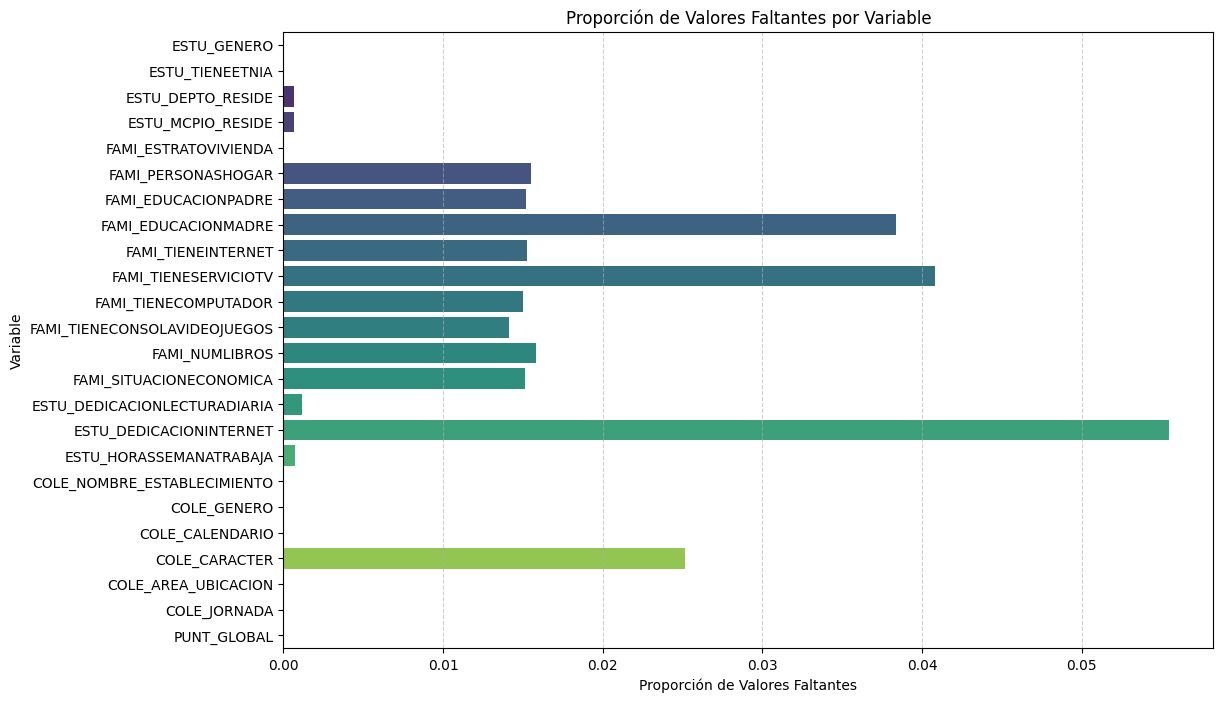

In [9]:
missing_data = df2.isnull().mean().reset_index()
missing_data.columns = ['Variable', 'Missing']

plt.figure(figsize=(12, 8))
sns.barplot(data=missing_data, x='Missing', y='Variable', palette='viridis')
plt.xlabel('Proporción de Valores Faltantes')
plt.ylabel('Variable')
plt.title('Proporción de Valores Faltantes por Variable')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Observamos que la mayoría de los datos faltantes está relacionada con la información del núcleo familiar y condiciones de vida del estudiante.

Ahora bien, para visualizar mejor los datos faltantes en este conjunto de datos y saber si están dispersos o acumulados en una sola área, podemos ejecutar el siguiente código

<Figure size 1200x800 with 0 Axes>

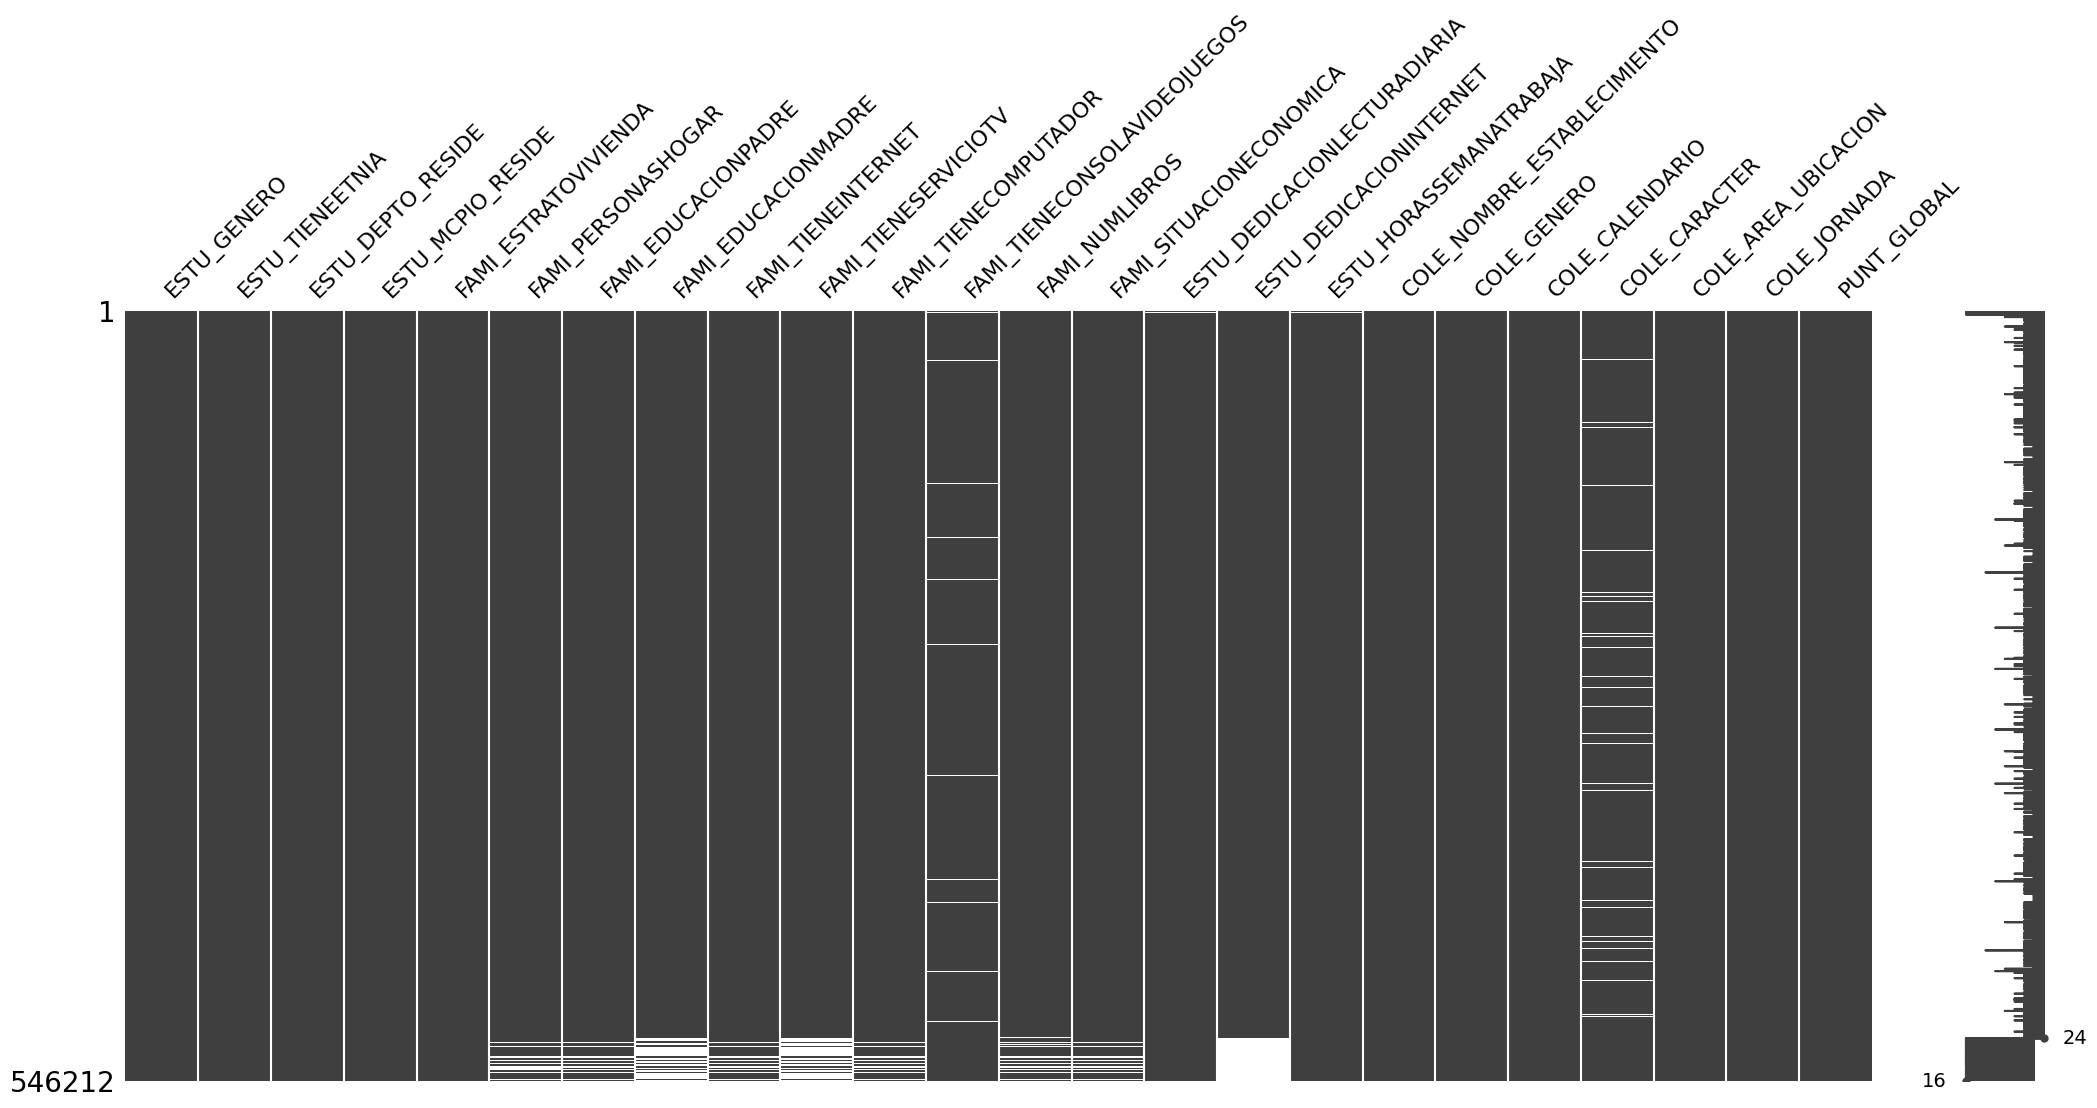

In [10]:
# Crear un nuevo DataFrame ordenado solo para la gráfica
df_grafica = df2.sort_values('ESTU_DEDICACIONINTERNET')

# Graficar el DataFrame ordenado solo para la visualización
plt.figure(figsize=(12, 8))
missingno.matrix(df=df_grafica)
plt.show()

Aquí notamos que hay variables que comparten la misma ausencia de datos en el mismo rango de filas, por lo que podemos eliminar completamente estos datos

# Eliminacion de datos faltantes

Se realizará la eliminación de todas las filas donde haya al menos 1 dato faltante.

In [4]:
df3 = df2[~(df2 == '-').any(axis=1)].dropna()
df3.replace('-', np.nan).dropna()

# Reiniciar el índice
df3.reset_index(drop=True, inplace=True)

df3.shape

(464685, 24)

Fueron eliminados 81.527 registros del archivo, lo cual representa alrededor del 14%

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464685 entries, 0 to 546211
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   ESTU_GENERO                   464685 non-null  object
 1   ESTU_TIENEETNIA               464685 non-null  object
 2   ESTU_DEPTO_RESIDE             464685 non-null  object
 3   ESTU_MCPIO_RESIDE             464685 non-null  object
 4   FAMI_ESTRATOVIVIENDA          464685 non-null  object
 5   FAMI_PERSONASHOGAR            464685 non-null  object
 6   FAMI_EDUCACIONPADRE           464685 non-null  object
 7   FAMI_EDUCACIONMADRE           464685 non-null  object
 8   FAMI_TIENEINTERNET            464685 non-null  object
 9   FAMI_TIENESERVICIOTV          464685 non-null  object
 10  FAMI_TIENECOMPUTADOR          464685 non-null  object
 11  FAMI_TIENECONSOLAVIDEOJUEGOS  464685 non-null  object
 12  FAMI_NUMLIBROS                464685 non-null  object
 13  FAMI

# Analisis Por Variable

## Analisis de Estrato social

Analizamos si hay diferencias significativas entre los diferentes estratos sociales de los estudiantes.

Primero, obtengamos la media del puntaje global de cada estrato y su desviación estándar.

In [13]:
# Asegurarte de que los datos estén en el formato correcto
df3['FAMI_ESTRATOVIVIENDA'] = df3['FAMI_ESTRATOVIVIENDA'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por estrato socioeconómico
estadisticas = df3.groupby('FAMI_ESTRATOVIVIENDA')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Estrato Socioeconómico', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas.sort_values(by='Promedio Puntaje Global'))

  Estrato Socioeconómico  Promedio Puntaje Global  Desviación Estándar
6            Sin Estrato               208.274192            42.088939
0              Estrato 1               237.523900            45.483023
1              Estrato 2               251.376226            47.639516
5              Estrato 6               254.150094            71.989602
2              Estrato 3               263.955558            51.572273
4              Estrato 5               269.448971            66.952459
3              Estrato 4               273.410484            61.807322


Ahora, comparemos cada estrato para identificar estadísticamente cuáles de ellos son distintos.

In [14]:
# Agrupar los puntajes globales por estrato socioeconómico
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_ESTRATOVIVIENDA')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}')

# Asegúrate de que los datos estén en el formato correcto
df3['FAMI_ESTRATOVIVIENDA'] = df3['FAMI_ESTRATOVIVIENDA'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_ESTRATOVIVIENDA')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['FAMI_ESTRATOVIVIENDA'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 5786.78, Valor p: 0.0000
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
Estrato 1   Estrato 2  13.8523    0.0  13.3365  14.3682   True
Estrato 1   Estrato 3  26.4317    0.0  25.8359  27.0275   True
Estrato 1   Estrato 4  35.8866    0.0   34.867  36.9062   True
Estrato 1   Estrato 5  31.9251    0.0  30.1663  33.6838   True
Estrato 1   Estrato 6  16.6262    0.0  14.0327  19.2197   True
Estrato 1 Sin Estrato -29.2497    0.0 -30.4968 -28.0027   True
Estrato 2   Estrato 3  12.5793    0.0  12.0032  13.1554   True
Estrato 2   Estrato 4  22.0343    0.0   21.026  23.0425   True
Estrato 2   Estrato 5  18.0727    0.0  16.3206  19.8249   True
Estrato 2   Estrato 6   2.7739 0.0265   0.1848   5.3629   True
Estrato 2 Sin Estrato  -43.102    0.0 -44.3398 -41.8643   True
Estrato 3   Estrato 4   9.4549    0.0   8.4035  10.5063   True
Estrato 3   Est

Observamos que todos son significativamente distintos, esto nos indica que el estrato social del estudiante influye en una mejor obtención de resultados.

## Análisis de Etnia

In [15]:
# Asegurarte de que los datos estén en el formato correcto
df3['ESTU_TIENEETNIA'] = df3['ESTU_TIENEETNIA'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por Etnia
estadisticas = df3.groupby('ESTU_TIENEETNIA')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Etnia', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas)

  Etnia  Promedio Puntaje Global  Desviación Estándar
0    No               251.945687            50.499338
1    Si               220.378464            46.322537


In [16]:
# Agrupar los puntajes globales por Etnia
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('ESTU_TIENEETNIA')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['ESTU_TIENEETNIA'] = df3['ESTU_TIENEETNIA'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('ESTU_TIENEETNIA')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['ESTU_TIENEETNIA'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 11711.53, Valor p: 0.0000

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    No     Si -31.5672   0.0 -32.1389 -30.9955   True
-----------------------------------------------------


* **Diferencias Significativas:** Existen diferencias significativas en los puntajes globales del ICFES entre estudiantes que pertenecen a un grupo étnico y aquellos que no. Esto sugiere que la pertenencia a un grupo étnico puede estar asociada con diferencias en el rendimiento académico.

* **Dirección de la Diferencia:** Los estudiantes que no pertenecen a un grupo étnico tienden a obtener puntajes más altos en comparación con aquellos que sí pertenecen. Esto puede indicar desigualdades en el acceso a recursos educativos, apoyo familiar, o diferencias en la preparación académica.

* **Implicaciones:** Estos resultados pueden tener importantes implicaciones para la formulación de políticas educativas y programas de apoyo. Es crucial investigar más a fondo las razones detrás de estas diferencias y considerar estrategias para abordar cualquier desigualdad que pueda estar presente.

## Análisis de Genero

In [17]:
# Asegurarte de que los datos estén en el formato correcto
df3['ESTU_GENERO'] = df3['ESTU_GENERO'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por Genero
estadisticas = df3.groupby('ESTU_GENERO')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Genero', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas)

  Genero  Promedio Puntaje Global  Desviación Estándar
0      F               245.860836            49.587903
1      M               254.491286            51.941901


In [18]:
# Agrupar los puntajes globales por Genero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('ESTU_GENERO')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['ESTU_GENERO'] = df3['ESTU_GENERO'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('ESTU_GENERO')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['ESTU_GENERO'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 3342.21, Valor p: 0.0000

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
     F      M   8.6305   0.0 8.3379 8.923   True
------------------------------------------------


* **Diferencias Significativas:** Existen diferencias significativas en los puntajes globales del ICFES entre los géneros. Esto sugiere que el género puede estar asociado con diferencias en el rendimiento académico.

* **Dirección de la Diferencia:** Las estudiantes femeninas tienden a obtener puntajes más bajos en comparación con los estudiantes masculinos. Esto puede ser indicativo de una serie de factores, como diferencias en la preparación académica, metodologías de enseñanza, o incluso diferencias en la motivación y el apoyo familiar.

## Análisis de Personas en el Hogar

In [19]:
# Asegurarte de que los datos estén en el formato correcto
df3['FAMI_PERSONASHOGAR'] = df3['FAMI_PERSONASHOGAR'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por Personas en el hogar
estadisticas = df3.groupby('FAMI_PERSONASHOGAR')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Personas en el hogar', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas)

  Personas en el hogar  Promedio Puntaje Global  Desviación Estándar
0                1 a 2               248.949887            52.691802
1                3 a 4               256.565533            50.977716
2                5 a 6               245.783872            49.323980
3                7 a 8               234.376217            47.790474
4              9 o más               227.615930            47.897931


In [20]:
# Agrupar los puntajes globales por Personas en el hogar
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_PERSONASHOGAR')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['FAMI_PERSONASHOGAR'] = df3['FAMI_PERSONASHOGAR'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_PERSONASHOGAR')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['FAMI_PERSONASHOGAR'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 2912.55, Valor p: 0.0000

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj  lower    upper   reject
------------------------------------------------------
 1 a 2   3 a 4   7.6156   0.0   6.8213     8.41   True
 1 a 2   5 a 6   -3.166   0.0  -3.9876  -2.3444   True
 1 a 2   7 a 8 -14.5737   0.0 -15.5915 -13.5558   True
 1 a 2 9 o más  -21.334   0.0 -22.6776 -19.9903   True
 3 a 4   5 a 6 -10.7817   0.0 -11.2382 -10.3251   True
 3 a 4   7 a 8 -22.1893   0.0 -22.9439 -21.4347   True
 3 a 4 9 o más -28.9496   0.0 -30.1066 -27.7926   True
 5 a 6   7 a 8 -11.4077   0.0 -12.1909 -10.6245   True
 5 a 6 9 o más -18.1679   0.0 -19.3438 -16.9921   True
 7 a 8 9 o más  -6.7603   0.0  -8.0808  -5.4398   True
------------------------------------------------------


* **Diferencias Significativas:** Existen diferencias significativas en los puntajes globales del ICFES entre los grupos definidos por el número de personas en el hogar del estudiante. Esto sugiere que el tamaño del hogar está asociado con diferencias en el rendimiento académico.

* **Tendencia Negativa:** A medida que aumenta el número de personas en el hogar, los puntajes globales promedio tienden a disminuir. Esto puede indicar que los estudiantes de hogares más grandes enfrentan desafíos adicionales, como menos recursos y atención individual, que pueden afectar su desempeño académico.

* I**mplicaciones**: Estos resultados resaltan la necesidad de considerar el contexto familiar de los estudiantes al evaluar su rendimiento y desarrollar estrategias de apoyo. Programas que brinden recursos y apoyo adicional a los estudiantes de hogares más grandes pueden ser beneficiosos para promover la equidad en el sistema educativo.

## Análisis de la educacion del padre

In [21]:
# Asegurarte de que los datos estén en el formato correcto
df3['FAMI_EDUCACIONPADRE'] = df3['FAMI_EDUCACIONPADRE'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por educacion del padre
estadisticas = df3.groupby('FAMI_EDUCACIONPADRE')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Personas en el hogar', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas.sort_values(by='Promedio Puntaje Global'))

                    Personas en el hogar  Promedio Puntaje Global  \
2                                Ninguno               213.886018   
7                    Primaria incompleta               232.079187   
6                      Primaria completa               237.399707   
9   Secundaria (Bachillerato) incompleta               243.340653   
8     Secundaria (Bachillerato) completa               251.712495   
4                                No sabe               253.278506   
3                              No Aplica               256.072147   
11      Técnica o tecnológica incompleta               261.643164   
10        Técnica o tecnológica completa               270.626545   
1       Educación profesional incompleta               277.667029   
0         Educación profesional completa               279.400626   
5                              Postgrado               313.401872   

    Desviación Estándar  
2             42.587114  
7             43.829620  
6             45.610814 

In [22]:
# Agrupar los puntajes globales por educacion del padre
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_EDUCACIONPADRE')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['FAMI_EDUCACIONPADRE'] = df3['FAMI_EDUCACIONPADRE'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_EDUCACIONPADRE')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['FAMI_EDUCACIONPADRE'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 6349.34, Valor p: 0.0000

                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                                
               group1                               group2                meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------------------------------
      Educación profesional completa     Educación profesional incompleta  -1.7336 0.0655  -3.5159   0.0487  False
      Educación profesional completa                              Ninguno -65.5146    0.0 -66.9256 -64.1036   True
      Educación profesional completa                            No Aplica -23.3285    0.0 -25.4398 -21.2172   True
      Educación profesional completa                              No sabe -26.1221    0.0 -27.3006 -24.9436   True
      Educación profesional completa                            Postgrado  34.0012    0.0  32.1921  35.8104   True
      Educación profesional completa   

* **Diferencias Significativas:** Existen diferencias significativas en los puntajes globales del ICFES entre los grupos definidos por el estudio del padre. Esto sugiere que la educacion del padre está asociado con diferencias en el rendimiento académico, pero en un solo caso, no se encontraron diferencias significativas y esta fue cuando la educacion del padre es profesional completa e incompleta.

* **Tendencia Negativa:** A medida que disminuye el nivel de educacion, los puntajes globales promedio tienden a disminuir. Esto puede indicar que los estudiantes de hogares con padres sin preparacion academica enfrentan desafíos adicionales, como menos incentivo al estudio, que pueden afectar su desempeño académico.

* **Implicaciones**: Estos resultados resaltan la necesidad de considerar el contexto familiar de los estudiantes al evaluar su rendimiento y desarrollar estrategias de apoyo. Programas que brinden recursos y apoyo adicional a los padres pueden ser beneficiosos para promover la equidad en el sistema educativo.

## Análisis de la educacion de la Madre

In [24]:
# Asegurarte de que los datos estén en el formato correcto
df3['FAMI_EDUCACIONMADRE'] = df3['FAMI_EDUCACIONMADRE'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por educacion de la madre
estadisticas = df3.groupby('FAMI_EDUCACIONMADRE')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Personas en el hogar', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas.sort_values(by='Promedio Puntaje Global'))

                    Personas en el hogar  Promedio Puntaje Global  \
2                                Ninguno               210.375282   
7                    Primaria incompleta               227.536358   
3                              No Aplica               230.059913   
6                      Primaria completa               233.638144   
9   Secundaria (Bachillerato) incompleta               240.312143   
8     Secundaria (Bachillerato) completa               249.615883   
4                                No sabe               251.667193   
11      Técnica o tecnológica incompleta               259.915672   
10        Técnica o tecnológica completa               268.537012   
1       Educación profesional incompleta               276.013010   
0         Educación profesional completa               279.273776   
5                              Postgrado               309.296227   

    Desviación Estándar  
2             41.696621  
7             42.797755  
3             56.460230 

In [25]:
# Agrupar los puntajes globales por educacion del padre
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_EDUCACIONMADRE')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['FAMI_EDUCACIONMADRE'] = df3['FAMI_EDUCACIONMADRE'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_EDUCACIONMADRE')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['FAMI_EDUCACIONMADRE'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 7262.20, Valor p: 0.0000

                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                                
               group1                               group2                meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------------------------------
      Educación profesional completa     Educación profesional incompleta  -3.2608    0.0  -4.8598  -1.6618   True
      Educación profesional completa                              Ninguno -68.8985    0.0 -70.5384 -67.2586   True
      Educación profesional completa                            No Aplica -49.2139    0.0  -54.327 -44.1008   True
      Educación profesional completa                              No sabe -27.6066    0.0 -29.4318 -25.7814   True
      Educación profesional completa                            Postgrado  30.0225    0.0  28.3495  31.6954   True
      Educación profesional completa   

* **Diferencias Significativas:** Existen diferencias significativas en los puntajes globales del ICFES entre los grupos definidos por el estudio de la madre. Esto sugiere que la educacion de la madre está asociado con diferencias en el rendimiento académico.

* **Tendencia Negativa:** A medida que disminuye el nivel de educacion, los puntajes globales promedio tienden a disminuir. Esto puede indicar que los estudiantes de hogares con padres sin preparacion academica enfrentan desafíos adicionales, como menos incentivo al estudio, que pueden afectar su desempeño académico.

* **Implicaciones**: Estos resultados resaltan la necesidad de considerar el contexto familiar de los estudiantes al evaluar su rendimiento y desarrollar estrategias de apoyo. Programas que brinden recursos y apoyo adicional a los padres pueden ser beneficiosos para promover la equidad en el sistema educativo.

## Análisis de Estudiantes con Internet

In [26]:
# Asegurarte de que los datos estén en el formato correcto
df3['FAMI_TIENEINTERNET'] = df3['FAMI_TIENEINTERNET'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por estudiantes con internet
estadisticas = df3.groupby('FAMI_TIENEINTERNET')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Internet en el hogar', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas)

  Internet en el hogar  Promedio Puntaje Global  Desviación Estándar
0                   No               231.326562            44.863272
1                   Si               261.395064            50.966816


In [27]:
# Agrupar los puntajes globales por estudiantes con internet
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_TIENEINTERNET')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['FAMI_TIENEINTERNET'] = df3['FAMI_TIENEINTERNET'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_TIENEINTERNET')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['FAMI_TIENEINTERNET'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 41989.26, Valor p: 0.0000

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    No     Si  30.0685   0.0 29.7809 30.3561   True
---------------------------------------------------


* **Diferencias Significativas:** Existen diferencias significativas en los puntajes globales del ICFES entre los estudiantes que tienen acceso a internet y aquellos que no. Esto sugiere que el acceso a internet tiene un impacto positivo en el rendimiento académico.

* **Magnitud de la Diferencia:** La diferencia promedio de 30.00 puntos es considerable y sugiere que el acceso a internet puede proporcionar ventajas significativas en términos de recursos educativos, investigación y apoyo académico.

* **Implicaciones:** Estos resultados resaltan la importancia del acceso a internet en el hogar como un factor que puede influir en el rendimiento académico de los estudiantes. Esto puede estar relacionado con la capacidad de acceder a materiales de estudio en línea, participar en clases virtuales, y realizar investigaciones.

## Análisis de Estudiantes con Televisión

In [28]:
# Asegurarte de que los datos estén en el formato correcto
df3['FAMI_TIENESERVICIOTV'] = df3['FAMI_TIENESERVICIOTV'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por estudiantes con television
estadisticas = df3.groupby('FAMI_TIENESERVICIOTV')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Television en el hogar', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas)

  Television en el hogar  Promedio Puntaje Global  Desviación Estándar
0                     No               237.520614            48.891337
1                     Si               253.548450            50.850755


In [29]:
# Agrupar los puntajes globales por estudiantes con television
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_TIENESERVICIOTV')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['FAMI_TIENESERVICIOTV'] = df3['FAMI_TIENESERVICIOTV'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_TIENESERVICIOTV')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['FAMI_TIENESERVICIOTV'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 8446.60, Valor p: 0.0000

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
    No     Si  16.0278   0.0 15.686 16.3696   True
--------------------------------------------------


* **Diferencias Significativas:** Existen diferencias significativas en los puntajes globales del ICFES entre los estudiantes que tienen acceso a servicio de televisión y aquellos que no. Esto sugiere que el acceso a servicio de televisión puede tener un impacto positivo en el rendimiento académico.

* **Magnitud de la Diferencia:** La diferencia promedio de 16.12 puntos es notable y sugiere que el acceso a servicio de televisión puede proporcionar ventajas en términos de recursos educativos y entretenimiento que pueden influir en el aprendizaje.

* **Implicaciones:** Estos resultados resaltan la importancia del acceso a servicios de entretenimiento y educativos en el hogar como factores que pueden influir en el rendimiento académico de los estudiantes. Esto puede estar relacionado con la exposición a programas educativos, documentales y otros contenidos que fomentan el aprendizaje.

## Análisis de Estudiantes con Computadora

In [30]:
# Asegurarte de que los datos estén en el formato correcto
df3['FAMI_TIENECOMPUTADOR'] = df3['FAMI_TIENECOMPUTADOR'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por estudiantes con Computadora
estadisticas = df3.groupby('FAMI_TIENECOMPUTADOR')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Computadora en el hogar', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas)

  Computadora en el hogar  Promedio Puntaje Global  Desviación Estándar
0                      No               232.744558            45.247764
1                      Si               262.766884            51.056291


In [31]:
# Agrupar los puntajes globales por estudiantes con Computadora
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_TIENECOMPUTADOR')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['FAMI_TIENECOMPUTADOR'] = df3['FAMI_TIENECOMPUTADOR'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_TIENECOMPUTADOR')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['FAMI_TIENECOMPUTADOR'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 43469.68, Valor p: 0.0000

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    No     Si  30.0223   0.0 29.7401 30.3046   True
---------------------------------------------------


* **Diferencias Significativas:** Existen diferencias significativas en los puntajes globales del ICFES entre los estudiantes que tienen acceso a computadora y aquellos que no. Esto sugiere que el acceso a computadoras tiene un impacto positivo en el rendimiento académico.

* **Magnitud de la Diferencia:** La diferencia promedio de 29.98 puntos es considerable y sugiere que el acceso a computadoras puede proporcionar ventajas significativas en términos de recursos educativos, investigación y apoyo académico.

* **Implicaciones:** Estos resultados resaltan la importancia del acceso a tecnología en el hogar como un factor que puede influir en el rendimiento académico de los estudiantes. Esto puede estar relacionado con la capacidad de acceder a materiales de estudio en línea, realizar investigaciones y participar en actividades educativas.

## Análisis de Estudiantes con Video Juegos

In [32]:
# Asegurarte de que los datos estén en el formato correcto
df3['FAMI_TIENECONSOLAVIDEOJUEGOS'] = df3['FAMI_TIENECONSOLAVIDEOJUEGOS'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por estudiantes con video juegos
estadisticas = df3.groupby('FAMI_TIENECONSOLAVIDEOJUEGOS')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Videos Juegos en el hogar', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas)

  Videos Juegos en el hogar  Promedio Puntaje Global  Desviación Estándar
0                        No               245.116086            49.095276
1                        Si               265.748233            53.457267


In [33]:
# Agrupar los puntajes globales por estudiantes con video juegos
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_TIENECONSOLAVIDEOJUEGOS')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['FAMI_TIENECONSOLAVIDEOJUEGOS'] = df3['FAMI_TIENECONSOLAVIDEOJUEGOS'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_TIENECONSOLAVIDEOJUEGOS')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['FAMI_TIENECONSOLAVIDEOJUEGOS'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 13786.90, Valor p: 0.0000

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    No     Si  20.6321   0.0 20.2877 20.9765   True
---------------------------------------------------


* **Diferencias Significativas:** Existen diferencias significativas en los puntajes globales del ICFES entre los estudiantes que tienen acceso a consolas de videojuegos y aquellos que no. Esto sugiere que el acceso a consolas de videojuegos puede tener un impacto positivo en el rendimiento académico.

* **Magnitud de la Diferencia:** La diferencia promedio de 20.46 puntos es notable y sugiere que el acceso a consolas de videojuegos puede proporcionar ventajas en términos de habilidades cognitivas, resolución de problemas y aprendizaje interactivo.

* **Implicaciones:** Estos resultados resaltan la importancia del acceso a tecnologías de entretenimiento en el hogar como un factor que puede influir en el rendimiento académico de los estudiantes. Los videojuegos pueden fomentar habilidades como la concentración, la coordinación y el pensamiento crítico, que son útiles en el contexto educativo.

## Análisis de Numero de libros leídos

In [34]:
# Asegurarte de que los datos estén en el formato correcto
df3['FAMI_NUMLIBROS'] = df3['FAMI_NUMLIBROS'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por Numeros de libros leidos
estadisticas = df3.groupby('FAMI_NUMLIBROS')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Libros leidos', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas)

       Libros leidos  Promedio Puntaje Global  Desviación Estándar
0      0 A 10 LIBROS               232.848384            45.060536
1     11 A 25 LIBROS               250.964571            48.803803
2    26 A 100 LIBROS               271.371848            49.894462
3  MÁS DE 100 LIBROS               278.433561            55.869454


In [35]:
# Agrupar los puntajes globales por estudiantes con Numeros de libros leidos
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_NUMLIBROS')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['FAMI_NUMLIBROS'] = df3['FAMI_NUMLIBROS'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_NUMLIBROS')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['FAMI_NUMLIBROS'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 18379.87, Valor p: 0.0000

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------------
  0 A 10 LIBROS    11 A 25 LIBROS  18.1162   0.0 17.6839 18.5485   True
  0 A 10 LIBROS   26 A 100 LIBROS  38.5235   0.0 38.0398 39.0072   True
  0 A 10 LIBROS MÁS DE 100 LIBROS  45.5852   0.0 44.8405 46.3299   True
 11 A 25 LIBROS   26 A 100 LIBROS  20.4073   0.0 19.8966  20.918   True
 11 A 25 LIBROS MÁS DE 100 LIBROS   27.469   0.0 26.7065 28.2315   True
26 A 100 LIBROS MÁS DE 100 LIBROS   7.0617   0.0  6.2689  7.8545   True
-----------------------------------------------------------------------


* **Diferencias Significativas:** Existen diferencias significativas en los puntajes globales del ICFES entre los grupos definidos por el número de libros en el hogar. Esto sugiere que el acceso a libros está asociado con diferencias en el rendimiento académico.

* **Tendencia Positiva:** A medida que aumenta el número de libros en el hogar, los puntajes globales promedio tienden a aumentar. Esto puede indicar que los estudiantes de hogares con más libros tienen mayor exposición a la lectura y el conocimiento, lo que puede beneficiar su desempeño académico.

* **Implicaciones:** Estos resultados resaltan la importancia del acceso a libros y recursos de lectura en el hogar como un factor que puede influir en el rendimiento académico de los estudiantes. La lectura y el acceso a información pueden fomentar habilidades como la comprensión, el análisis y el pensamiento crítico.

## Análisis por situación económica

In [36]:
# Asegurarte de que los datos estén en el formato correcto
df3['FAMI_SITUACIONECONOMICA'] = df3['FAMI_SITUACIONECONOMICA'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por situación económica
estadisticas = df3.groupby('FAMI_SITUACIONECONOMICA')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Situacion economica', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas.sort_values(by='Promedio Puntaje Global'))

  Situacion economica  Promedio Puntaje Global  Desviación Estándar
1               Mejor               242.754222            51.647178
0               Igual               250.802197            50.081229
2                Peor               258.139668            51.196847


In [37]:
# Agrupar los puntajes globales por estudiantes con situación económica
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_SITUACIONECONOMICA')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['FAMI_SITUACIONECONOMICA'] = df3['FAMI_SITUACIONECONOMICA'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_SITUACIONECONOMICA')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['FAMI_SITUACIONECONOMICA'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 2044.44, Valor p: 0.0000

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Igual  Mejor   -8.048   0.0 -8.4606 -7.6354   True
 Igual   Peor   7.3375   0.0  6.8163  7.8587   True
 Mejor   Peor  15.3854   0.0 14.7998 15.9711   True
---------------------------------------------------


* **Diferencias Significativas:** Se confirma que existen diferencias significativas en los puntajes globales del ICFES entre los grupos según la situación económica. Esto indica que la situación económica del hogar tiene un impacto en el rendimiento académico de los estudiantes.

* **Tendencias en los Puntajes:** Los estudiantes de hogares con una situación económica "Peor" obtienen el puntaje promedio más alto (256.67), seguido por aquellos en una situación "Igual" (249.46), "Mejor" (241.13), y finalmente, aquellos sin información (220.64).
Esto sugiere que, a pesar de la situación económica, los estudiantes en hogares con menos recursos pueden tener un rendimiento académico comparable o incluso superior a otros grupos, lo que podría estar relacionado con factores como la motivación, el apoyo familiar o la calidad de la educación recibida.

* **Implicaciones:** Los resultados resaltan la importancia de considerar la situación económica como un factor que influye en el rendimiento académico. Sin embargo, la tendencia de los puntajes sugiere que no es el único factor determinante, y que otros elementos también juegan un papel crucial.

## Análisis por dedicación a la lectura

In [38]:
# Asegurarte de que los datos estén en el formato correcto
df3['ESTU_DEDICACIONLECTURADIARIA'] = df3['ESTU_DEDICACIONLECTURADIARIA'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por dedicacion a la lectura
estadisticas = df3.groupby('ESTU_DEDICACIONLECTURADIARIA')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Tiempo de lectura', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas.sort_values(by='Promedio Puntaje Global'))

            Tiempo de lectura  Promedio Puntaje Global  Desviación Estándar
4  No leo por entretenimiento               240.702955            48.626135
0          30 minutos o menos               243.221591            48.979360
2       Entre 30 y 60 minutos               257.854481            50.845959
1           Entre 1 y 2 horas               259.622653            53.298315
3              Más de 2 horas               268.583130            53.052109


In [39]:
# Agrupar los puntajes globales por estudiantes con dedicacion a la lectura
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_SITUACIONECONOMICA')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['FAMI_SITUACIONECONOMICA'] = df3['FAMI_SITUACIONECONOMICA'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('FAMI_SITUACIONECONOMICA')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['FAMI_SITUACIONECONOMICA'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 2044.44, Valor p: 0.0000

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Igual  Mejor   -8.048   0.0 -8.4606 -7.6354   True
 Igual   Peor   7.3375   0.0  6.8163  7.8587   True
 Mejor   Peor  15.3854   0.0 14.7998 15.9711   True
---------------------------------------------------


* **Diferencias Significativas:** Se confirma que existen diferencias significativas en los puntajes globales del ICFES entre los grupos según el tiempo dedicado a la lectura por entretenimiento. Esto sugiere que el tiempo dedicado a la lectura tiene un impacto en el rendimiento académico de los estudiantes.

* **Tendencias en los Puntajes:** Los estudiantes que dedican "Más de 2 horas" a la lectura por entretenimiento obtienen el puntaje promedio más alto (267.15), seguidos por aquellos que leen "Entre 1 y 2 horas" (258.45) y "Entre 30 y 60 minutos" (256.84).
Los estudiantes que leen "30 minutos o menos" (242.10) y "No leen por entretenimiento" (237.99) obtienen los puntajes más bajos.
Estos resultados indican una relación positiva entre el tiempo dedicado a la lectura por entretenimiento y el rendimiento académico. Cuanto más tiempo dedican los estudiantes a la lectura, mejor es su desempeño en el examen ICFES.

* **Implicaciones:** Los resultados resaltan la importancia de fomentar el hábito de la lectura entre los estudiantes, ya que puede tener un impacto significativo en su rendimiento académico.

## Análisis por dedicación a internet

In [40]:
# Asegurarte de que los datos estén en el formato correcto
df3['ESTU_DEDICACIONINTERNET'] = df3['ESTU_DEDICACIONINTERNET'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por dedicación a internet
estadisticas = df3.groupby('ESTU_DEDICACIONINTERNET')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Dedicacion al internet', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas.sort_values(by='Promedio Puntaje Global'))

  Dedicacion al internet  Promedio Puntaje Global  Desviación Estándar
4     No Navega Internet               223.471012            46.964501
0     30 minutos o menos               233.747912            46.860728
2  Entre 30 y 60 minutos               244.652252            48.637806
1      Entre 1 y 3 horas               260.383472            50.964446
3         Más de 3 horas               260.903281            50.457728


In [41]:
# Agrupar los puntajes globales por estudiantes con dedicacion a la lectura
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('ESTU_DEDICACIONINTERNET')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['ESTU_DEDICACIONINTERNET'] = df3['ESTU_DEDICACIONINTERNET'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('ESTU_DEDICACIONINTERNET')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['ESTU_DEDICACIONINTERNET'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 7129.01, Valor p: 0.0000

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                group2        meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------
   30 minutos o menos     Entre 1 y 3 horas  26.6356    0.0  26.0397  27.2314   True
   30 minutos o menos Entre 30 y 60 minutos  10.9043    0.0  10.2877   11.521   True
   30 minutos o menos        Más de 3 horas  27.1554    0.0  26.5022  27.8085   True
   30 minutos o menos    No Navega Internet -10.2769    0.0 -11.2354  -9.3184   True
    Entre 1 y 3 horas Entre 30 y 60 minutos -15.7312    0.0 -16.2544  -15.208   True
    Entre 1 y 3 horas        Más de 3 horas   0.5198 0.0892   -0.046   1.0856  False
    Entre 1 y 3 horas    No Navega Internet -36.9125    0.0 -37.8137 -36.0113   True
Entre 30 y 60 minutos        Más de 3 horas   16.251    0.0  15.6634  16.8386   True
Entre 30 y 60 minutos   

* **Diferencias Significativas:** Se confirma que existen diferencias significativas en los puntajes globales del ICFES entre los grupos según el tiempo dedicado a navegar por internet. Esto sugiere que el tiempo dedicado a navegar por internet tiene un impacto en el rendimiento académico de los estudiantes.

* **Tendencias en los Puntajes:** Los estudiantes que navegan "Entre 1 y 3 horas" y "Más de 3 horas" obtienen los puntajes más altos (259.33 y 259.97, respectivamente), seguidos por aquellos que navegan "Entre 30 y 60 minutos" (243.44) y "30 minutos o menos" (232.18).
Los estudiantes que "No navegan internet" y aquellos con "Sin información" obtienen los puntajes más bajos (222.07 y 221.64, respectivamente).
Esto sugiere que un uso moderado y productivo de internet puede estar asociado con un mejor rendimiento académico.

* **Implicaciones:** Los resultados resaltan la importancia de cómo se utiliza el tiempo en internet. No solo el acceso a internet es relevante, sino también la cantidad de tiempo y la calidad del contenido consumido.

## Análisis por horas trabajadas a la semana

In [43]:
# Asegurarte de que los datos estén en el formato correcto
df3['ESTU_HORASSEMANATRABAJA'] = df3['ESTU_HORASSEMANATRABAJA'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por horas trabajadas a la semana
estadisticas = df3.groupby('ESTU_HORASSEMANATRABAJA')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Horas trabajadas', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas.sort_values(by='Promedio Puntaje Global'))

      Horas trabajadas  Promedio Puntaje Global  Desviación Estándar
4      Más de 30 horas               222.756681            42.748584
2  Entre 21 y 30 horas               232.598661            45.438725
1  Entre 11 y 20 horas               235.953523            46.604429
3    Menos de 10 horas               237.459601            48.375474
0                    0               256.606733            50.986547


In [44]:
# Agrupar los puntajes globales por estudiantes con dedicacion a la lectura
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('ESTU_HORASSEMANATRABAJA')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['ESTU_HORASSEMANATRABAJA'] = df3['ESTU_HORASSEMANATRABAJA'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('ESTU_HORASSEMANATRABAJA')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['ESTU_HORASSEMANATRABAJA'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 4981.31, Valor p: 0.0000

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj  lower    upper   reject
-------------------------------------------------------------------------------
                  0 Entre 11 y 20 horas -20.6532   0.0 -21.4136 -19.8928   True
                  0 Entre 21 y 30 horas -24.0081   0.0 -25.2517 -22.7644   True
                  0   Menos de 10 horas -19.1471   0.0 -19.6739 -18.6203   True
                  0     Más de 30 horas -33.8501   0.0 -34.9626 -32.7375   True
Entre 11 y 20 horas Entre 21 y 30 horas  -3.3549   0.0  -4.7721  -1.9376   True
Entre 11 y 20 horas   Menos de 10 horas   1.5061   0.0   0.6462    2.366   True
Entre 11 y 20 horas     Más de 30 horas -13.1968   0.0 -14.5005 -11.8931   True
Entre 21 y 30 horas   Menos de 10 horas   4.8609   0.0   3.5541   6.1678   True
Entre 21 y 30 horas     Más de 30 horas   -9.842   0.0 -11.4754  -8.2086   True

* **Diferencias Significativas:** Se confirma que existen diferencias significativas en los puntajes globales del ICFES entre los grupos según el número de horas semanales trabajadas. Esto sugiere que el trabajo durante la semana tiene un impacto en el rendimiento académico de los estudiantes.

* **Tendencias en los Puntajes:** Los estudiantes que no trabajan ("0 horas") obtienen el puntaje promedio más alto (255.32), seguidos por aquellos que trabajan "Menos de 10 horas" (235.82), "Entre 11 y 20 horas" (234.47) y "Entre 21 y 30 horas" (230.81).
Los estudiantes que trabajan "Más de 30 horas" obtienen el puntaje más bajo (221.41).
Esto sugiere que trabajar durante la semana, especialmente en exceso, puede tener un impacto negativo en el rendimiento académico de los estudiantes.

* **Implicaciones:** Los resultados resaltan la importancia de encontrar un equilibrio entre las actividades académicas y laborales de los estudiantes. Trabajar durante la semana puede interferir con el tiempo dedicado al estudio y la preparación para el examen ICFES.

## Análisis por calendario del colegio

In [45]:
# Asegurarte de que los datos estén en el formato correcto
df3['COLE_CALENDARIO'] = df3['COLE_CALENDARIO'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por calendario del colegio
estadisticas = df3.groupby('COLE_CALENDARIO')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Calendario del colegio', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas.sort_values(by='Promedio Puntaje Global'))

  Calendario del colegio  Promedio Puntaje Global  Desviación Estándar
2                   OTRO               218.489658            42.874818
1                      B               237.549721            49.206495
0                      A               249.948292            50.843138


In [46]:
# Agrupar los puntajes globales por estudiantes con calendario del colegio
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('COLE_CALENDARIO')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['COLE_CALENDARIO'] = df3['COLE_CALENDARIO'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('COLE_CALENDARIO')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['COLE_CALENDARIO'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 422.73, Valor p: 0.0000

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     A      B -12.3986   0.0 -16.3827  -8.4144   True
     A   OTRO -31.4586   0.0 -34.0761 -28.8412   True
     B   OTRO -19.0601   0.0 -23.8206 -14.2995   True
-----------------------------------------------------


* **Diferencias Significativas:** Se confirma que existen diferencias significativas en los puntajes globales del ICFES entre los grupos según el tipo de calendario del colegio. Esto sugiere que el tipo de calendario tiene un impacto en el rendimiento académico.

* **Tendencias en los Puntajes:** Los estudiantes en colegios con Calendario A obtienen el puntaje promedio más alto (248.37), seguidos por aquellos en Calendario B (236.21) y finalmente, los de Otro (216.98).
Esto indica que los estudiantes en colegios con Calendario A tienen un rendimiento académico superior en comparación con los otros tipos de calendario.

* **Implicaciones:** Los resultados resaltan la importancia del tipo de calendario en el rendimiento académico. Es posible que las diferencias en la estructura del calendario escolar, la duración del año académico, o la metodología de enseñanza asociada a cada tipo de calendario influyan en el rendimiento de los estudiantes.

## Análisis por carácter del colegio

In [47]:
# Asegurarte de que los datos estén en el formato correcto
df3['COLE_CARACTER'] = df3['COLE_CARACTER'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por calendario del colegio
estadisticas = df3.groupby('COLE_CARACTER')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Caracter del colegio', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas.sort_values(by='Promedio Puntaje Global'))

  Caracter del colegio  Promedio Puntaje Global  Desviación Estándar
1            NO APLICA               230.486518            49.994244
2              TÉCNICO               243.469338            48.439105
3    TÉCNICO/ACADÉMICO               248.194126            48.255140
0            ACADÉMICO               252.557269            52.676220


In [48]:
# Agrupar los puntajes globales por estudiantes con calendario del colegio
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('COLE_CARACTER')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['COLE_CARACTER'] = df3['COLE_CARACTER'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('COLE_CARACTER')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['COLE_CARACTER'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 853.47, Valor p: 0.0000

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1        group2      meandiff p-adj  lower    upper   reject
-------------------------------------------------------------------
ACADÉMICO         NO APLICA -22.0708   0.0 -23.7769 -20.3646   True
ACADÉMICO           TÉCNICO  -9.0879   0.0  -9.7196  -8.4563   True
ACADÉMICO TÉCNICO/ACADÉMICO  -4.3631   0.0  -4.7819  -3.9444   True
NO APLICA           TÉCNICO  12.9828   0.0  11.2013  14.7643   True
NO APLICA TÉCNICO/ACADÉMICO  17.7076   0.0  15.9901  19.4252   True
  TÉCNICO TÉCNICO/ACADÉMICO   4.7248   0.0   4.0629   5.3867   True
-------------------------------------------------------------------


* **Diferencias Significativas:** Se confirma que existen diferencias significativas en los puntajes globales del ICFES entre los grupos según el carácter del colegio. Esto sugiere que el carácter del colegio tiene un impacto en el rendimiento académico.

* **Tendencias en los Puntajes:** Los estudiantes en colegios Académicos obtienen el puntaje promedio más alto (250.92), seguidos por aquellos en colegios Técnico/Académico (246.86), Técnico (241.97), No Aplica (228.74) y finalmente, aquellos sin información (218.68).
Esto indica que los estudiantes en colegios Académicos tienen un rendimiento académico superior en comparación con los otros tipos de colegios.

* **Implicaciones:** Los resultados resaltan la importancia del carácter del colegio en el rendimiento académico. Es posible que las diferencias en el énfasis académico, la calidad de la enseñanza y los recursos disponibles en cada tipo de colegio influyan en el desempeño de los estudiantes.

## Análisis por ubicacion del colegio

In [49]:
# Asegurarte de que los datos estén en el formato correcto
df3['COLE_AREA_UBICACION'] = df3['COLE_AREA_UBICACION'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por calendario del colegio
estadisticas = df3.groupby('COLE_AREA_UBICACION')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Ubicacion del colegio', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas.sort_values(by='Promedio Puntaje Global'))

  Ubicacion del colegio  Promedio Puntaje Global  Desviación Estándar
0                 RURAL               229.384380            47.027433
1                URBANO               253.533163            50.639375


In [50]:
# Agrupar los puntajes globales por estudiantes por ubicacion del colegio
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('COLE_CARACTER')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['COLE_AREA_UBICACION'] = df3['COLE_AREA_UBICACION'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('COLE_AREA_UBICACION')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['COLE_AREA_UBICACION'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 853.47, Valor p: 0.0000

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 RURAL URBANO  24.1488   0.0 23.7511 24.5465   True
---------------------------------------------------


* **Diferencias Significativas:**
Los puntajes del ICFES varían significativamente según la ubicación del colegio (rural vs. urbano), el nivel educativo de los padres y el tiempo dedicado a la lectura e internet. Los estudiantes de colegios urbanos obtienen puntajes más altos, lo que sugiere que factores como el acceso a recursos educativos y la calidad de la enseñanza influyen en el rendimiento académico.

* **Tendencias en los Puntajes:**
A lo largo de los años, los puntajes promedio del ICFES han mostrado un aumento general, indicando mejoras en la calidad educativa. Sin embargo, también se han observado caídas en algunas áreas del conocimiento, lo que resalta la necesidad de reformas en el sistema educativo, especialmente dado que más del 50% de los estudiantes no alcanzan competencias básicas en lectura, matemáticas y ciencias según el informe PISA 2022.

* **Implicaciones:**
Las diferencias en los puntajes del ICFES son cruciales para el acceso a la educación superior y oportunidades de becas. Es fundamental invertir en la educación, mejorar la formación docente y los recursos educativos, especialmente en áreas rurales. Además, fomentar la lectura y el uso responsable de internet puede contribuir a mejorar el rendimiento académico de los estudiantes.

## Análisis por jornada del colegio

In [51]:
# Asegurarte de que los datos estén en el formato correcto
df3['COLE_JORNADA'] = df3['COLE_JORNADA'].astype(str)  # Convertir a string si es necesario

# Calcular el promedio y la desviación estándar del puntaje global por calendario del colegio
estadisticas = df3.groupby('COLE_JORNADA')['PUNT_GLOBAL'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas.columns = ['Jornada del colegior', 'Promedio Puntaje Global', 'Desviación Estándar']

# Mostrar los resultados
print(estadisticas.sort_values(by='Promedio Puntaje Global'))

  Jornada del colegior  Promedio Puntaje Global  Desviación Estándar
3             SABATINA               208.190042            37.547937
2                NOCHE               208.393734            38.663408
4                TARDE               246.842695            46.261012
1               MAÑANA               249.231833            48.336811
5                UNICA               253.603718            46.080569
0             COMPLETA               276.734572            52.649994


In [52]:
# Agrupar los puntajes globales por estudiantes con calendario del colegio
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('COLE_JORNADA')]

# Realizar la prueba ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f'Estadístico F: {f_stat:.2f}, Valor p: {p_value:.4f}\n')

# Asegúrate de que los datos estén en el formato correcto
df3['COLE_JORNADA'] = df3['COLE_JORNADA'].astype(str)  # Convertir a string si es necesario

# Realizar la prueba ANOVA primero
grupos = [group['PUNT_GLOBAL'].dropna() for name, group in df3.groupby('COLE_JORNADA')]
f_stat, p_value = f_oneway(*grupos)

if p_value < 0.05:  # Solo si hay diferencias significativas
    # Realizar la prueba de Tukey
    tukey_result = pairwise_tukeyhsd(df3['PUNT_GLOBAL'].dropna(), df3['COLE_JORNADA'].dropna())
    print(tukey_result)
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico F: 13135.12, Valor p: 0.0000

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
COMPLETA   MAÑANA -27.5027    0.0 -28.0593 -26.9462   True
COMPLETA    NOCHE -68.3408    0.0 -69.3237  -67.358   True
COMPLETA SABATINA -68.5445    0.0 -69.5039 -67.5851   True
COMPLETA    TARDE -29.8919    0.0 -30.6554 -29.1284   True
COMPLETA    UNICA -23.1309    0.0  -23.867 -22.3947   True
  MAÑANA    NOCHE -40.8381    0.0 -41.7447 -39.9315   True
  MAÑANA SABATINA -41.0418    0.0 -41.9229 -40.1607   True
  MAÑANA    TARDE  -2.3891    0.0  -3.0516  -1.7267   True
  MAÑANA    UNICA   4.3719    0.0   3.7412   5.0026   True
   NOCHE SABATINA  -0.2037 0.9967  -1.4006   0.9933  False
   NOCHE    TARDE   38.449    0.0  37.4025  39.4955   True
   NOCHE    UNICA    45.21    0.0  44.1833  46.2367   True
SABATINA    TARDE  38.6527    0.0  37.6282  39.6771   True
SABATINA    UN

* **Diferencias Significativas:**
Se confirma que existen diferencias significativas en los puntajes globales del ICFES entre los grupos según el tipo de jornada del colegio. Esto sugiere que el tipo de jornada tiene un impacto en el rendimiento académico.

* **Tendencias en los Puntajes:**
Los estudiantes en colegios con jornada Completa obtienen el puntaje promedio más alto (275.55), seguidos por aquellos en jornada Única (252.67) y Mañana (247.93).
Los estudiantes en jornada Noche (206.95) y Sabatina (206.73) obtienen los puntajes más bajos, lo que sugiere que estos tipos de jornada pueden estar asociados con un rendimiento académico inferior.

* **Implicaciones:**
Los resultados resaltan la importancia del tipo de jornada en el rendimiento académico. Es posible que las diferencias en la estructura del horario, la metodología de enseñanza y el ambiente educativo asociado a cada tipo de jornada influyan en el desempeño de los estudiantes.

# Análisis de Correlación

El análisis de correlación es una técnica estadística fundamental que se utiliza para evaluar la relación entre dos o más variables.

**Objetivos del Análisis de Correlación**

**Identificación de Relaciones:** Permite determinar si existe una relación entre dos variables. Por ejemplo, puede ayudar a averiguar si hay un vínculo entre la cantidad de horas de estudio y el rendimiento académico.

**Cuantificación de la Fuerza y Dirección:** El análisis proporciona un coeficiente de correlación que cuantifica tanto la fuerza como la dirección de la relación. Este coeficiente varía entre -1 y +1:

* **Correlación Positiva:** Un valor cercano a +1 indica que a medida que una variable aumenta, la otra también tiende a aumentar.

* **Correlación Negativa:** Un valor cercano a -1 sugiere que a medida que una variable aumenta, la otra tiende a disminuir.

* **Sin Correlación:** Un valor alrededor de 0 indica que no hay una relación lineal significativa entre las variables

                              ESTU_GENERO  ESTU_TIENEETNIA  \
ESTU_GENERO                      1.000000        -0.007905   
ESTU_TIENEETNIA                 -0.007905         1.000000   
FAMI_ESTRATOVIVIENDA             0.059343        -0.116969   
FAMI_PERSONASHOGAR              -0.008676         0.085502   
FAMI_EDUCACIONPADRE              0.035734        -0.054525   
FAMI_EDUCACIONMADRE              0.031208        -0.076936   
FAMI_TIENEINTERNET               0.034902        -0.149199   
FAMI_TIENESERVICIOTV             0.004275        -0.076378   
FAMI_TIENECOMPUTADOR             0.035273        -0.115305   
FAMI_TIENECONSOLAVIDEOJUEGOS     0.169050        -0.072494   
FAMI_NUMLIBROS                   0.010119        -0.059240   
FAMI_SITUACIONECONOMICA          0.023474        -0.000231   
ESTU_DEDICACIONLECTURADIARIA    -0.143251         0.021559   
ESTU_DEDICACIONINTERNET          0.004349        -0.093914   
ESTU_HORASSEMANATRABAJA          0.166135         0.020373   
PUNT_GLO

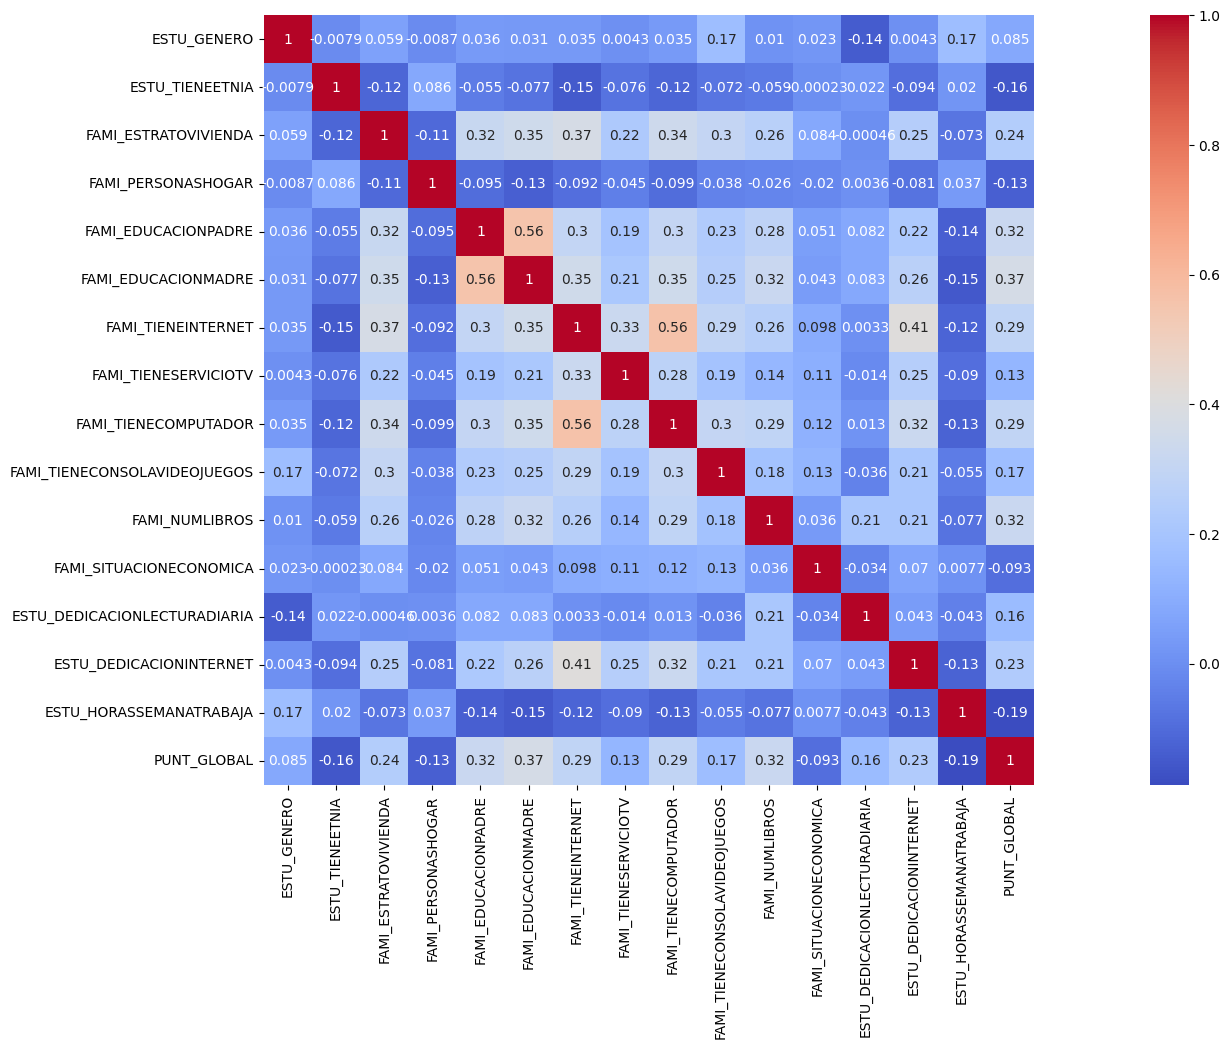

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Eliminamos variables que no se consideran importantes para solucionar un problema
df4 = df3.drop(['ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'COLE_CALENDARIO',
                 'COLE_NOMBRE_ESTABLECIMIENTO'], axis=1).copy()
df4.reset_index(drop=True, inplace=True)

# Convertir variables categóricas nominales y ordinales en variables numéricas
le = LabelEncoder()

# Lista de columnas categóricas y sus mapeos
categorical_columns = {
    'ESTU_GENERO' : {'F':0, 'M':1},
    'ESTU_TIENEETNIA': {'No':0, 'Si':1},
    'FAMI_ESTRATOVIVIENDA': {
        'Sin Estrato': 0,
        'Estrato 1': 1,
        'Estrato 2': 2,
        'Estrato 3': 3,
        'Estrato 4': 4,
        'Estrato 5': 5,
        'Estrato 6': 6
    },
    'FAMI_PERSONASHOGAR': {
        '1 a 2': 1,
        '3 a 4': 2,
        '5 a 6': 3,
        '7 a 8': 4,
        '9 o más': 5
    },
    'FAMI_EDUCACIONPADRE': {
        'Ninguno' : 0,
        'No Aplica' : 1,
        'No sabe' : 2,
        'Primaria incompleta' : 3,
        'Primaria completa' : 4,
        'Secundaria (Bachillerato) incompleta' : 5,
        'Secundaria (Bachillerato) completa' : 6,
        'Técnica o tecnológica incompleta' : 7,
        'Técnica o tecnológica completa' : 8,
        'Educación profesional incompleta' : 9,
        'Educación profesional completa' : 10,
        'Postgrado' : 11  
    },
    'FAMI_EDUCACIONMADRE':  {
        'Ninguno' : 0,
        'No Aplica' : 1,
        'No sabe' : 2,
        'Primaria incompleta' : 3,
        'Primaria completa' : 4,
        'Secundaria (Bachillerato) incompleta' : 5,
        'Secundaria (Bachillerato) completa' : 6,
        'Técnica o tecnológica incompleta' : 7,
        'Técnica o tecnológica completa' : 8,
        'Educación profesional incompleta' : 9,
        'Educación profesional completa' : 10,
        'Postgrado' : 11  
    },
    'FAMI_TIENEINTERNET': {'No':0, 'Si':1},
    'FAMI_TIENESERVICIOTV': {'No':0, 'Si':1},
    'FAMI_TIENECOMPUTADOR': {'No':0, 'Si':1},
    'FAMI_TIENECONSOLAVIDEOJUEGOS': {'No':0, 'Si':1},
    'FAMI_NUMLIBROS': {
        '0 A 10 LIBROS': 0,
        '11 A 25 LIBROS': 1,
        '26 A 100 LIBROS': 2,
        'MÁS DE 100 LIBROS': 3
    },
    'FAMI_SITUACIONECONOMICA': {'Peor':0, 'Mejor':2, 'Igual':1}, 
    'ESTU_DEDICACIONLECTURADIARIA': {
        'No leo por entretenimiento': -1, # Usar -1 para indicar "no aplica"
        '30 minutos o menos': 0,
        'Entre 30 y 60 minutos': 1,
        'Entre 1 y 2 horas': 2,
        'Más de 2 horas': 3
    },
    'ESTU_DEDICACIONINTERNET': {
        'No Navega Internet': -1, # Usar -1 para indicar "no aplica"
        '30 minutos o menos': 0,
        'Entre 30 y 60 minutos': 1,
        'Entre 1 y 3 horas': 2,
        'Más de 3 horas': 3
    },
    'ESTU_HORASSEMANATRABAJA': {
        '0' : -1, # Usar -1 para indicar "no aplica"
        'Menos de 10 horas': 0,
        'Entre 11 y 20 horas': 1,
        'Entre 21 y 30 horas': 2,
        'Más de 30 horas': 3
    },
}


# Convertir las columnas categóricas utilizando los mapeos definidos
for col in df4.columns:
    if col in categorical_columns:
        if categorical_columns[col] is not None:
            df4[col] = df4[col].map(categorical_columns[col])
        else:
            df4[col] = le.fit_transform(df4[col])

# Seleccionar solo las columnas numéricas
numeric_df = df4.select_dtypes(include=['int64', 'float64'])

# Estandarizar los datos numéricos
scaler = StandardScaler()
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Calcular la matriz de correlación sobre los datos estandarizados
corr_matrix = numeric_df_scaled.corr()
print(corr_matrix)

# Visualizar la matriz de correlación con heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

Aqui observamos como impactan nuestras variables sobre el puntaje global

**Correlaciones Significativas con PUNT_GLOBAL**
* **FAMI_EDUCACIONMADRE (0.367076):**
Existe una correlación positiva fuerte entre la educación de la madre y el rendimiento académico. Esto sugiere que a mayor nivel educativo de la madre, es probable que los estudiantes obtengan mejores puntuaciones.
* **FAMI_EDUCACIONPADRE (0.318287):**
Similar a la educación materna, la educación del padre también muestra una correlación positiva significativa con PUNT_GLOBAL. Esto indica que el nivel educativo de ambos padres puede influir positivamente en el rendimiento académico del estudiante.
* **FAMI_TIENEINTERNET (0.287876):**
La disponibilidad de internet en el hogar está positivamente correlacionada con el rendimiento académico. Esto sugiere que el acceso a recursos en línea puede facilitar el aprendizaje y mejorar las puntuaciones.
* **FAMI_NUMLIBROS (0.322215):**
El número de libros en el hogar también tiene una correlación positiva con PUNT_GLOBAL. Un entorno familiar rico en recursos educativos parece estar asociado con un mejor rendimiento escolar.
* **FAMI_TIENECOMPUTADOR (0.292480):**
La posesión de un computador en casa se relaciona positivamente con el rendimiento académico, lo que resalta la importancia de la tecnología en el aprendizaje.
* **ESTU_DEDICACIONINTERNET (0.230106):**
La dedicación al uso de internet para actividades académicas también muestra una correlación positiva, indicando que un uso efectivo de internet puede contribuir al éxito escolar.

**Correlaciones Negativas**
* **ESTU_TIENEETNIA (-0.156792):**
La pertenencia a ciertos grupos étnicos está negativamente correlacionada con el rendimiento académico, lo que podría indicar desigualdades educativas o socioeconómicas que afectan a estos estudiantes.
* **ESTU_HORASSEMANATRABAJA (-0.087768):**
Las horas trabajadas por los estudiantes presentan una correlación negativa con PUNT_GLOBAL, sugiriendo que un mayor tiempo dedicado al trabajo podría estar relacionado con un menor rendimiento académico.

# Evaluando el impacto del género y la etnia en los puntajes del examen del ICFES, identificando posibles diferencias en el rendimiento académico.

                                count        mean        std    min    25%  \
ESTU_GENERO ESTU_TIENEETNIA                                                  
F           No               235648.0  247.882931  49.321804  118.0  211.0   
            Si                17822.0  219.124060  45.145995  123.0  185.0   
M           No               197211.0  256.800285  51.452483  108.0  218.0   
            Si                14004.0  221.974864  47.731941  118.0  185.0   

                               50%    75%    max  
ESTU_GENERO ESTU_TIENEETNIA                       
F           No               245.0  282.0  473.0  
            Si               213.0  248.0  402.0  
M           No               255.0  294.0  477.0  
            Si               215.0  253.0  450.0  


C:\Users\Hector\AppData\Local\Temp\ipykernel_4392\3666058423.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ESTU_GENERO', y='PUNT_GLOBAL', hue='ESTU_TIENEETNIA', data=data, ci=None, order=order)


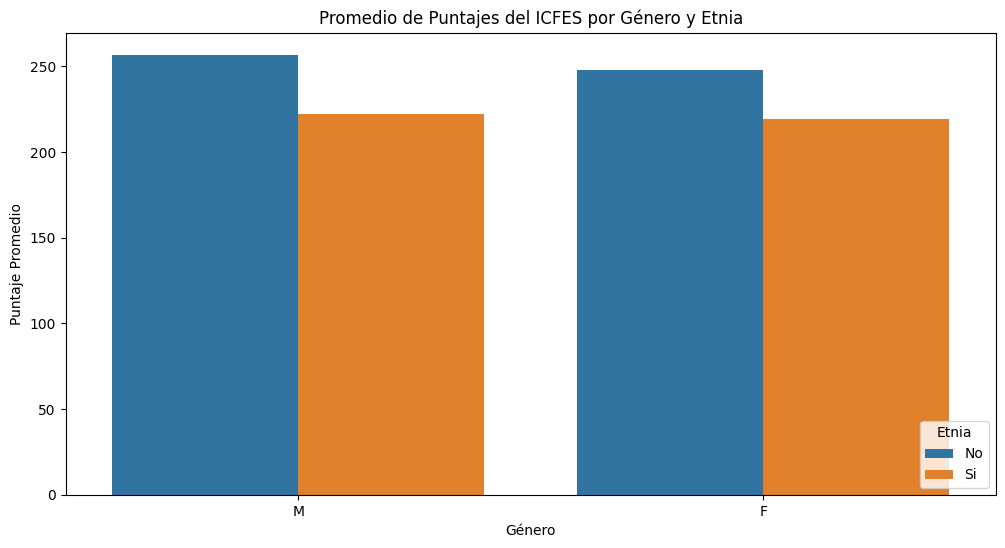

Test t: t-statistic = 57.81181736641254, p-value = 0.0
ANOVA: F-statistic = 11711.533565433736, p-value = 0.0


In [10]:
from scipy import stats
# Cargar los datos
data = df3.copy()

# Preprocesar los datos
data = data.dropna(subset=['PUNT_GLOBAL', 'ESTU_GENERO', 'ESTU_TIENEETNIA'])

# Análisis descriptivo
summary = data.groupby(['ESTU_GENERO', 'ESTU_TIENEETNIA'])['PUNT_GLOBAL'].describe()
print(summary)

# Calcular el promedio de PUNT_GLOBAL por ESTU_GENERO
order = data.groupby('ESTU_GENERO')['PUNT_GLOBAL'].mean().sort_values(ascending=False).index

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='ESTU_GENERO', y='PUNT_GLOBAL', hue='ESTU_TIENEETNIA', data=data, ci=None, order=order)
plt.title('Promedio de Puntajes del ICFES por Género y Etnia')
plt.xlabel('Género')
plt.ylabel('Puntaje Promedio')
plt.legend(title='Etnia', loc='lower right', bbox_to_anchor=(1, 0))
# Colocar la leyenda en la esquina inferior derecha
plt.legend(title='Etnia', loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

# Prueba t para comparar géneros
male_scores = data[data['ESTU_GENERO'] == 'M']['PUNT_GLOBAL']
female_scores = data[data['ESTU_GENERO'] == 'F']['PUNT_GLOBAL']
t_stat, p_value = stats.ttest_ind(male_scores, female_scores)
print(f'Test t: t-statistic = {t_stat}, p-value = {p_value}')

# ANOVA para comparar etnias
anova_result = stats.f_oneway(
    data[data['ESTU_TIENEETNIA'] == 'Si']['PUNT_GLOBAL'],
    data[data['ESTU_TIENEETNIA'] == 'No']['PUNT_GLOBAL']
)
print(f'ANOVA: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

**Análisis Descriptivo**
* Los estudiantes de género masculino (M) obtienen un puntaje promedio más alto (255.31) que los estudiantes de género femenino (F) (246.41) cuando no tienen etnia.
* Cuando tienen etnia, los estudiantes de género femenino (F) obtienen un puntaje promedio de 217.39, mientras que los estudiantes de género masculino (M) obtienen 220.00.
* Los estudiantes que no tienen etnia obtienen puntajes más altos en promedio que los estudiantes con etnia, tanto para hombres como para mujeres.

**Prueba t para Comparar Géneros**
* La prueba t muestra una diferencia estadísticamente significativa entre los puntajes de hombres y mujeres, con un p-valor de 0.0.

**ANOVA para Comparar Etnias**
* El análisis ANOVA también muestra una diferencia estadísticamente significativa entre los puntajes de estudiantes con y sin etnia, con un p-valor de 0.0.

**Conclusiones Generales**
* Existe una diferencia significativa en los puntajes del ICFES entre hombres y mujeres, siendo los hombres quienes obtienen puntajes más altos en promedio.
* Los estudiantes que no tienen etnia obtienen puntajes más altos que los estudiantes con etnia, independientemente de su género.
* Tanto el género como la etnia parecen tener un efecto significativo en los puntajes del ICFES.

# Investigar la relación entre el nivel socioeconómico de los estudiantes, medido a través del estrato de vivienda y el nivel educativo de los padres, y los resultados obtenidos en el examen del ICFES.

                                                            count        mean  \
FAMI_ESTRATOVIVIENDA FAMI_EDUCACIONPADRE                                        
Estrato 1            Educación profesional completa        5088.0  254.510220   
                     Educación profesional incompleta      1249.0  258.337070   
                     Ninguno                               8193.0  216.755523   
                     No Aplica                             1834.0  248.564885   
                     No sabe                               8148.0  240.266078   
...                                                           ...         ...   
Sin Estrato          Primaria incompleta                   4493.0  207.386379   
                     Secundaria (Bachillerato) completa    2325.0  211.003871   
                     Secundaria (Bachillerato) incompleta  2077.0  209.199807   
                     Técnica o tecnológica completa         332.0  225.466867   
                     Técnica

C:\Users\Hector\AppData\Local\Temp\ipykernel_4392\3516135004.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', hue='FAMI_EDUCACIONPADRE', data=data, ci=None, order=order)


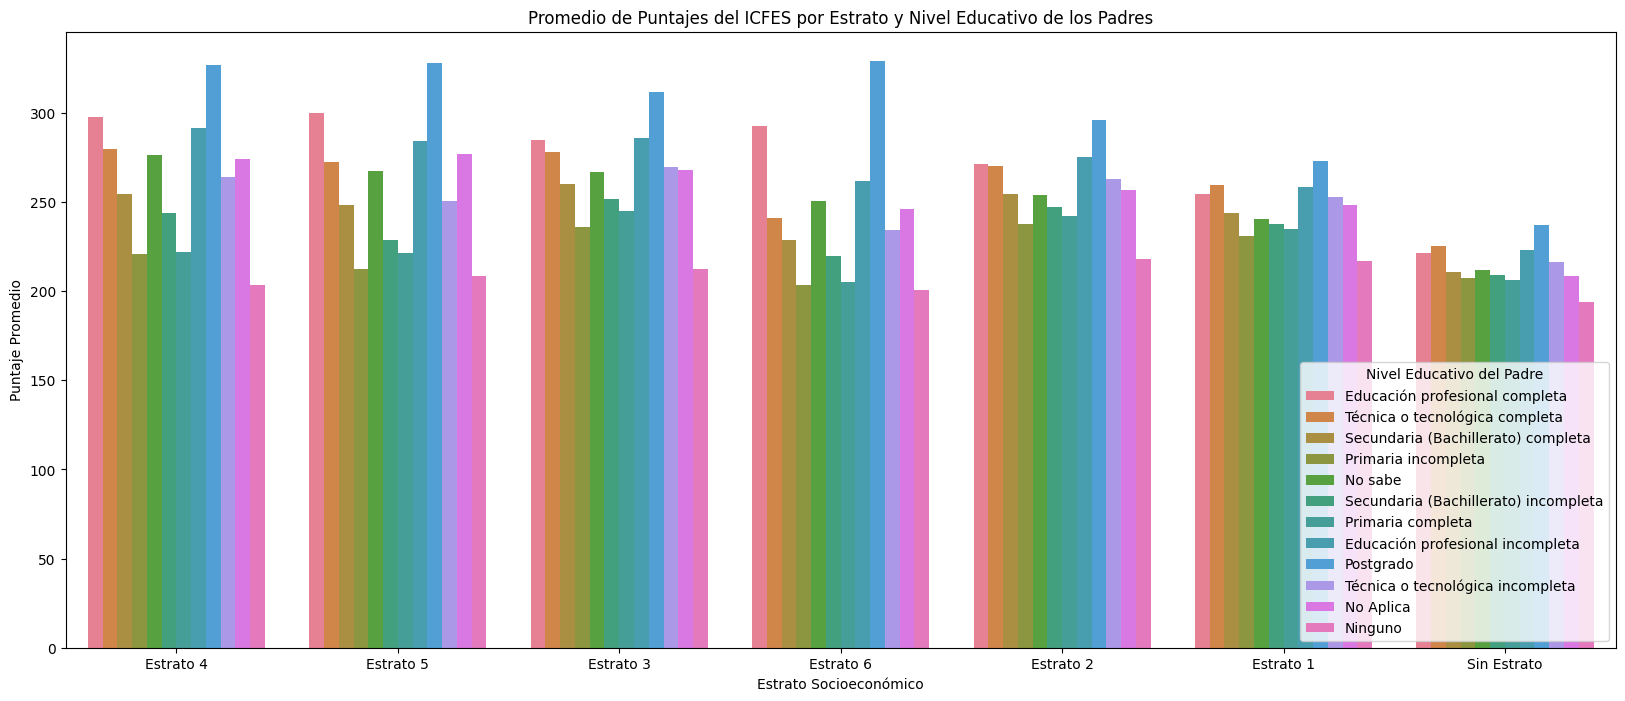

ANOVA: F-statistic = 4709.504625535216, p-value = 0.0


In [11]:
# Cargar los datos
data = df3.copy()

# Preprocesar los datos
data = data.dropna(subset=['PUNT_GLOBAL', 'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'])

# Análisis descriptivo
summary = data.groupby(['FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE'])['PUNT_GLOBAL'].describe()
print(summary)

# Calcular el promedio de PUNT_GLOBAL por FAMI_ESTRATOVIVIENDA
order = data.groupby('FAMI_ESTRATOVIVIENDA')['PUNT_GLOBAL'].mean().sort_values(ascending=False).index

# Gráfico de barras por estrato
plt.figure(figsize=(20, 8))
sns.barplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', hue='FAMI_EDUCACIONPADRE', data=data, ci=None, order=order)
plt.title('Promedio de Puntajes del ICFES por Estrato y Nivel Educativo de los Padres')
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Puntaje Promedio')
plt.legend(title='Nivel Educativo del Padre', loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

# ANOVA para comparar estratos
anova_result = stats.f_oneway(
    data[data['FAMI_ESTRATOVIVIENDA'] == 'Estrato 1']['PUNT_GLOBAL'],
    data[data['FAMI_ESTRATOVIVIENDA'] == 'Estrato 2']['PUNT_GLOBAL'],
    data[data['FAMI_ESTRATOVIVIENDA'] == 'Estrato 3']['PUNT_GLOBAL'],
    data[data['FAMI_ESTRATOVIVIENDA'] == 'Estrato 4']['PUNT_GLOBAL'],
    data[data['FAMI_ESTRATOVIVIENDA'] == 'Estrato 5']['PUNT_GLOBAL'],
    data[data['FAMI_ESTRATOVIVIENDA'] == 'Estrato 6']['PUNT_GLOBAL']
)
print(f'ANOVA: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

**Análisis Descriptivo**
* Los estudiantes cuyo padre tiene educación profesional completa obtienen el puntaje promedio más alto (252.26), seguidos de aquellos cuyo padre tiene educación profesional incompleta (244.31).
* Los estudiantes cuyo padre tiene "Ninguno" como nivel educativo obtienen el puntaje promedio más bajo (199.43).
* En general, a medida que aumenta el nivel educativo del padre, el puntaje promedio de los estudiantes también tiende a aumentar.
* Los estudiantes sin estrato socioeconómico definido obtienen puntajes promedio más bajos que aquellos con un estrato definido, independientemente del nivel educativo del padre.

**ANOVA para Comparar Grupos de Educación del Padre**
* El análisis ANOVA muestra una diferencia estadísticamente significativa entre los puntajes de los estudiantes agrupados por el nivel educativo del padre y el estrato socioeconómico, con un p-valor de 0.0.

**Conclusiones Generales**
* Existe una relación positiva entre el nivel educativo del padre y el puntaje promedio del estudiante en el ICFES.
* El estrato socioeconómico también parece tener un efecto significativo en los puntajes, siendo los estudiantes sin estrato definido quienes obtienen puntajes más bajos en promedio.
* Tanto el nivel educativo del padre como el estrato socioeconómico parecen tener un impacto importante en el rendimiento académico de los estudiantes en el ICFES.

# Comparar el rendimiento académico de los estudiantes según la ubicación geográfica de su colegio (urbano vs. rural) y el acceso a recursos tecnológicos en sus hogares.

                                                                count  \
COLE_AREA_UBICACION FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET             
RURAL               No                   No                   42859.0   
                                         Si                    6039.0   
                    Si                   No                    8927.0   
                                         Si                   14325.0   
URBANO              No                   No                   97898.0   
                                         Si                   54158.0   
                    Si                   No                   29761.0   
                                         Si                  210718.0   

                                                                   mean  \
COLE_AREA_UBICACION FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET               
RURAL               No                   No                  220.221820   
                                         Si 

C:\Users\Hector\AppData\Local\Temp\ipykernel_4392\3452934290.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='COLE_AREA_UBICACION', y='PUNT_GLOBAL', hue='FAMI_TIENECOMPUTADOR', data=data, ci=None, order=order)


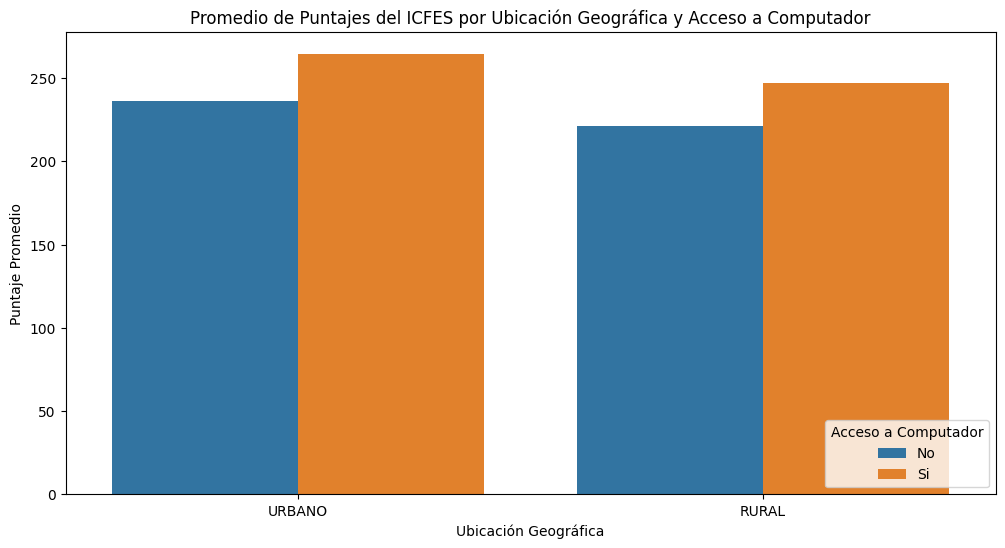

c:\Users\Hector\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


ANOVA: F-statistic = nan, p-value = nan
                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                 2.004e+04
Date:                Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:52:57   Log-Likelihood:            -2.4568e+06
No. Observations:              464685   AIC:                         4.914e+06
Df Residuals:                  464681   BIC:                         4.914e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [12]:
# Cargar los datos
data = df3.copy()

# Preprocesar los datos
data = data.dropna(subset=['PUNT_GLOBAL', 'COLE_AREA_UBICACION', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET'])

# Análisis descriptivo
summary = data.groupby(['COLE_AREA_UBICACION', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET'])['PUNT_GLOBAL'].describe()
print(summary)

# Calcular el promedio de PUNT_GLOBAL por COLE_AREA_UBICACION
order = data.groupby('COLE_AREA_UBICACION')['PUNT_GLOBAL'].mean().sort_values(ascending=False).index

# Gráfico de barras por ubicación y acceso a recursos
plt.figure(figsize=(12, 6))
sns.barplot(x='COLE_AREA_UBICACION', y='PUNT_GLOBAL', hue='FAMI_TIENECOMPUTADOR', data=data, ci=None, order=order)
plt.title('Promedio de Puntajes del ICFES por Ubicación Geográfica y Acceso a Computador')
plt.xlabel('Ubicación Geográfica')
plt.ylabel('Puntaje Promedio')
plt.legend(title='Acceso a Computador', loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

# ANOVA para comparar ubicaciones
anova_result = stats.f_oneway(
    data[data['COLE_AREA_UBICACION'] == 'Urbano']['PUNT_GLOBAL'],
    data[data['COLE_AREA_UBICACION'] == 'Rural']['PUNT_GLOBAL']
)
print(f'ANOVA: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

# Definir la variable dependiente (Y) y las independientes (X)
X = pd.get_dummies(data[['COLE_AREA_UBICACION', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET']], drop_first=True)
y = data['PUNT_GLOBAL']

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Convertir columnas a enteros si es necesario
X = X.astype(int)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(model.summary())

**Análisis Descriptivo**
1. Distribución de Puntajes por Área de Ubicación:
* Los estudiantes en áreas rurales que tienen acceso a internet y computadora obtienen puntajes promedio más altos (255.04) en comparación con aquellos que no tienen acceso a ninguno de estos recursos.
* En áreas urbanas, los puntajes promedio también son más altos para los estudiantes que tienen acceso a internet y computadora, con el grupo con acceso a internet obteniendo un puntaje promedio de 243.31.
2. Tendencias Generales:
* En general, los estudiantes que tienen acceso a una computadora y a internet tienden a obtener puntajes más altos en comparación con aquellos que no tienen acceso a estos recursos, tanto en áreas rurales como urbanas.
* Los puntajes promedio son más bajos para los estudiantes que no tienen acceso a ninguno de estos recursos, lo que sugiere que el acceso a tecnología puede influir positivamente en el rendimiento académico.

**Impacto del Acceso a Tecnología:**
* El acceso a computadoras e internet tiene un impacto positivo significativo en los puntajes de los estudiantes, lo que sugiere que la tecnología puede ser un factor clave en el rendimiento académico.

**Diferencias entre Áreas Rurales y Urbanas:**
* Los estudiantes en áreas urbanas tienden a tener un mejor rendimiento académico en comparación con aquellos en áreas rurales, lo que puede estar relacionado con el acceso a recursos educativos y tecnológicos.

**Recomendaciones:**
* Considerar políticas educativas que promuevan el acceso a tecnología en áreas rurales para cerrar la brecha de rendimiento académico.
* Implementar programas que proporcionen computadoras e internet a estudiantes en situaciones desfavorecidas, ya que esto podría mejorar significativamente sus resultados académicos.

# Determinar la influencia del tiempo dedicado a la lectura y al uso de internet en el desempeño académico de los estudiantes.

                                                        count        mean  \
ESTU_DEDICACIONLECTURADIARIA ESTU_DEDICACIONINTERNET                        
30 minutos o menos           30 minutos o menos       32547.0  229.740437   
                             Entre 1 y 3 horas        51471.0  254.670902   
                             Entre 30 y 60 minutos    54512.0  238.164533   
                             Más de 3 horas           30617.0  255.802593   
                             No Navega Internet       11397.0  220.403440   
Entre 1 y 2 horas            30 minutos o menos        7247.0  241.318753   
                             Entre 1 y 3 horas        17859.0  268.110756   
                             Entre 30 y 60 minutos    12349.0  254.702729   
                             Más de 3 horas           11490.0  269.562141   
                             No Navega Internet        2440.0  229.954918   
Entre 30 y 60 minutos        30 minutos o menos       22600.0  241.544735   

C:\Users\Hector\AppData\Local\Temp\ipykernel_4392\3287458609.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ESTU_DEDICACIONLECTURADIARIA', y='PUNT_GLOBAL', hue='ESTU_DEDICACIONINTERNET', data=data, ci=None, order=order)


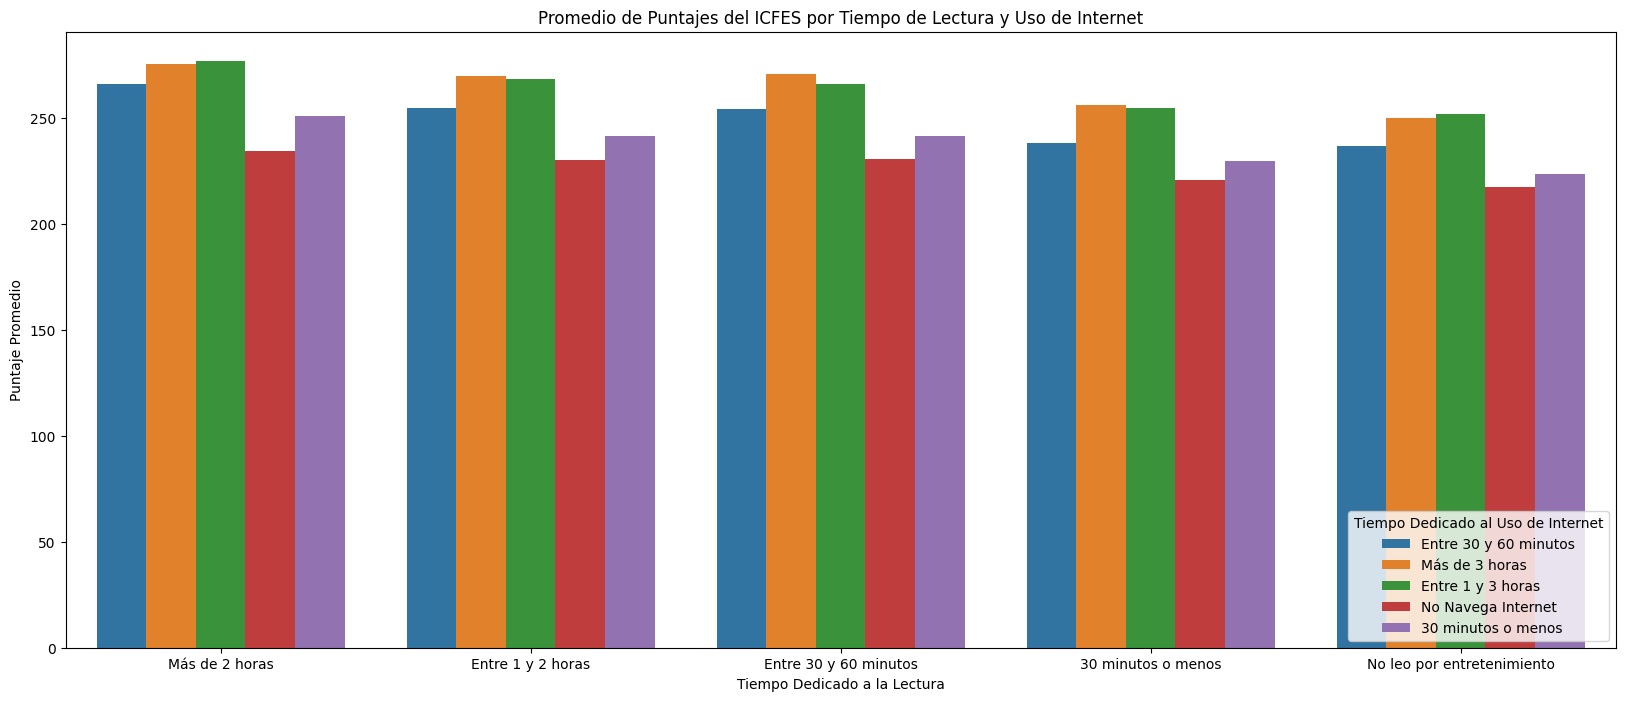

ANOVA para tiempo de lectura: F-statistic = 4340.24801385078, p-value = 0.0
ANOVA para tiempo de uso de internet: F-statistic = 4075.6204316314725, p-value = 0.0


In [13]:
# Cargar los datos
data = df3.copy()

# Preprocesar los datos
data = data.dropna(subset=['PUNT_GLOBAL', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET'])

# Análisis descriptivo
summary = data.groupby(['ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET'])['PUNT_GLOBAL'].describe()
print(summary)

# Calcular el promedio de PUNT_GLOBAL por ESTU_DEDICACIONLECTURADIARIA
order = data.groupby('ESTU_DEDICACIONLECTURADIARIA')['PUNT_GLOBAL'].mean().sort_values(ascending=False).index

# Gráfico de barras para tiempo de lectura y uso de internet
plt.figure(figsize=(20, 8))
sns.barplot(x='ESTU_DEDICACIONLECTURADIARIA', y='PUNT_GLOBAL', hue='ESTU_DEDICACIONINTERNET', data=data, ci=None, order=order)
plt.title('Promedio de Puntajes del ICFES por Tiempo de Lectura y Uso de Internet')
plt.xlabel('Tiempo Dedicado a la Lectura')
plt.ylabel('Puntaje Promedio')
plt.legend(title='Tiempo Dedicado al Uso de Internet')
# Colocar la leyenda en la esquina inferior derecha
plt.legend(title='Tiempo Dedicado al Uso de Internet', loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

# ANOVA para comparar grupos de tiempo de lectura
anova_result = stats.f_oneway(
    data[data['ESTU_DEDICACIONLECTURADIARIA'] == '30 minutos o menos']['PUNT_GLOBAL'],
    data[data['ESTU_DEDICACIONLECTURADIARIA'] == 'Entre 30 y 60 minutos']['PUNT_GLOBAL'],
    data[data['ESTU_DEDICACIONLECTURADIARIA'] == 'No leo por entretenimiento']['PUNT_GLOBAL']
)
print(f'ANOVA para tiempo de lectura: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

# ANOVA para comparar grupos de tiempo de uso de internet
anova_result = stats.f_oneway(
    data[data['ESTU_DEDICACIONINTERNET'] == 'Entre 30 y 60 minutos']['PUNT_GLOBAL'],
    data[data['ESTU_DEDICACIONINTERNET'] == 'Entre 1 y 3 horas']['PUNT_GLOBAL'],
    data[data['ESTU_DEDICACIONINTERNET'] == 'Más de 3 horas']['PUNT_GLOBAL']
)
print(f'ANOVA para tiempo de uso de internet: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')


**Análisis Descriptivo**
1. Dedicación a la Lectura:
* Los estudiantes que dedican más tiempo a la lectura (más de 3 horas) tienen un puntaje promedio de 255.01, lo que indica que una mayor dedicación a la lectura está asociada con un mejor rendimiento académico.
* Aquellos que no leen por entretenimiento obtienen un puntaje promedio más bajo (211.25) en comparación con los que leen, lo que sugiere que la lectura puede tener un impacto positivo en el rendimiento académico.
2. Dedicación al Uso de Internet:
* Los estudiantes que pasan entre 1 y 3 horas en internet obtienen un puntaje promedio de 267.25, que es el más alto en comparación con otros grupos de dedicación a internet.
* Aquellos que no navegan por internet tienen un puntaje promedio de 206.92, lo que indica que el uso de internet también puede estar relacionado con un mejor rendimiento académico, siempre que se utilice de manera adecuada.

**Resultados de ANOVA**
1. ANOVA para Tiempo de Lectura:
* El análisis ANOVA muestra una F-statistic de aproximadamente 5091.18 y un p-value de 0.0, lo que indica que hay diferencias estadísticamente significativas en los puntajes promedio de los estudiantes en función de su dedicación a la lectura.
* Esto sugiere que la cantidad de tiempo que los estudiantes dedican a la lectura tiene un efecto significativo en su rendimiento académico.
2. ANOVA para Tiempo de Uso de Internet:
* El análisis ANOVA para el tiempo de uso de internet también muestra una F-statistic de aproximadamente 4379.80 y un p-value de 0.0, lo que indica que hay diferencias estadísticamente significativas en los puntajes promedio de los estudiantes en función de su dedicación al uso de internet.
* Esto sugiere que el tiempo que los estudiantes pasan en internet también influye significativamente en su rendimiento académico.

**Conclusiones Generales**
* Impacto Positivo de la Lectura: La dedicación a la lectura está fuertemente relacionada con un mejor rendimiento académico. Los estudiantes que leen más tienden a obtener mejores puntajes en el ICFES.
* Uso Efectivo de Internet: El uso moderado de internet (entre 1 y 3 horas) se asocia con un mejor rendimiento académico, lo que sugiere que el tiempo en línea puede ser beneficioso si se utiliza de manera productiva.

**Recomendaciones:**
* Fomentar hábitos de lectura entre los estudiantes, ya que esto puede contribuir a mejorar su rendimiento académico.
* Promover el uso responsable y productivo de internet, asegurando que los estudiantes aprovechen esta herramienta para su aprendizaje y desarrollo académico.

# Determinar la influencia del nivel académico de los padres en el desempeño académico de los estudiantes.

                                                                         count  \
FAMI_EDUCACIONPADRE              FAMI_EDUCACIONMADRE                             
Educación profesional completa   Educación profesional completa        20001.0   
                                 Educación profesional incompleta       2510.0   
                                 Ninguno                                  79.0   
                                 No Aplica                                63.0   
                                 No sabe                                 515.0   
...                                                                        ...   
Técnica o tecnológica incompleta Primaria incompleta                     382.0   
                                 Secundaria (Bachillerato) completa     2474.0   
                                 Secundaria (Bachillerato) incompleta    985.0   
                                 Técnica o tecnológica completa         1656.0   
                

C:\Users\Hector\AppData\Local\Temp\ipykernel_4392\2731794523.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FAMI_EDUCACIONPADRE', y='PUNT_GLOBAL', hue='FAMI_EDUCACIONMADRE', data=data, ci=None, order=order)


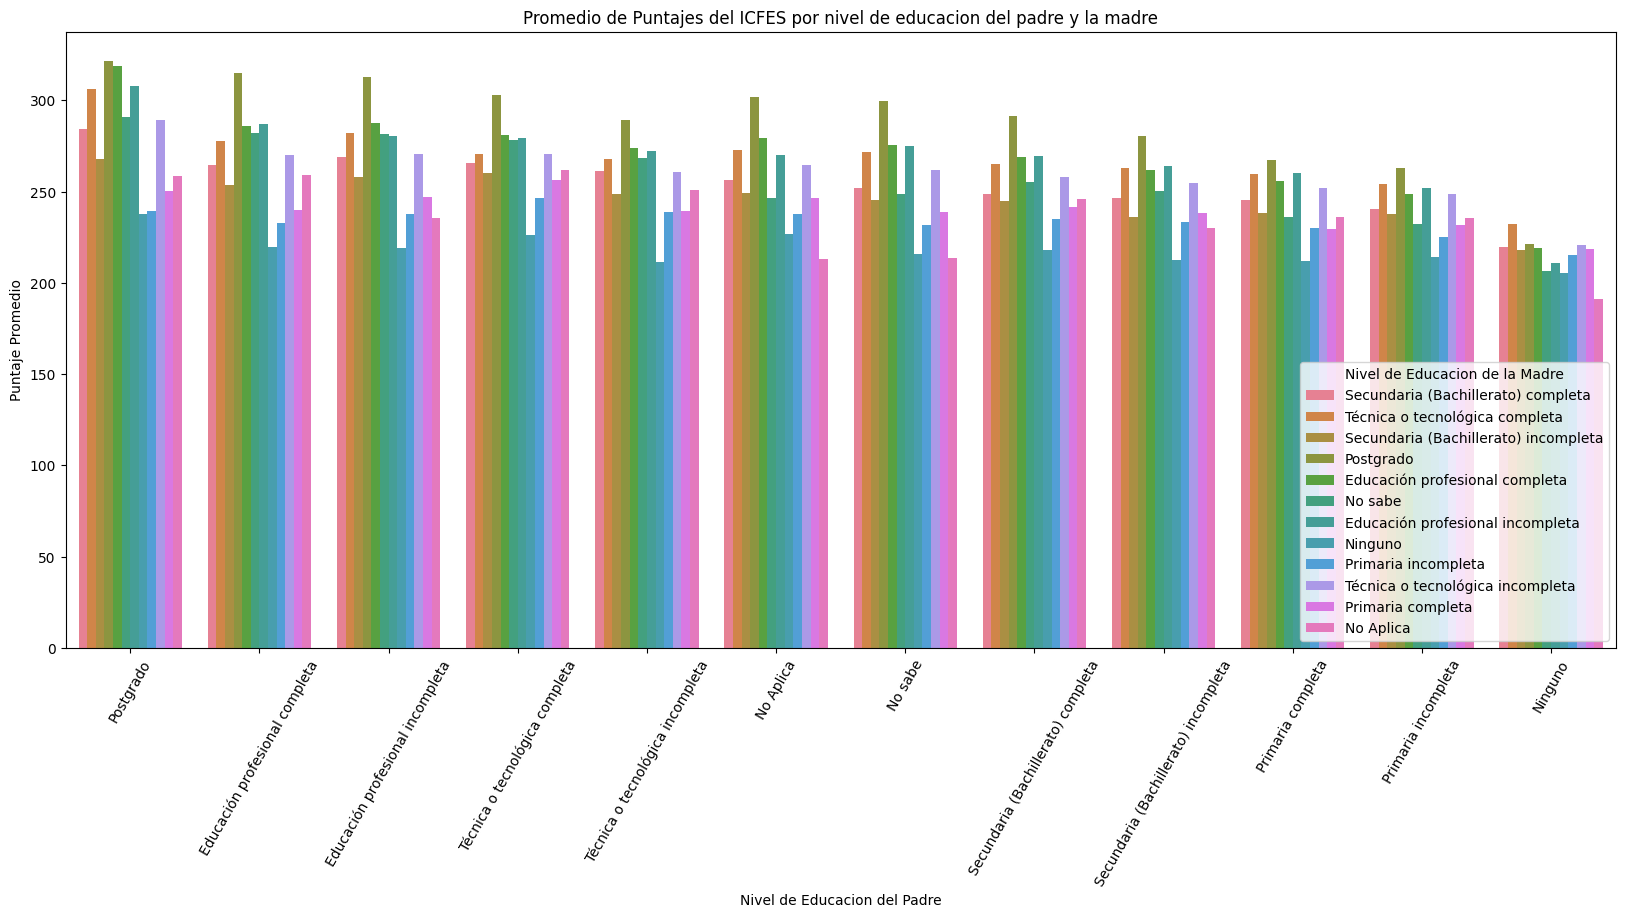

ANOVA para la profesion del padre: F-statistic = 6349.340364703375, p-value = 0.0
ANOVA para la profesion de la madre: F-statistic = 7262.199357150698, p-value = 0.0


In [20]:
# Cargar los datos
data = df3.copy()

# Preprocesar los datos
data = data.dropna(subset=['PUNT_GLOBAL', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'])

# Análisis descriptivo
summary = data.groupby(['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'])['PUNT_GLOBAL'].describe()
print(summary)

# Calcular el promedio de PUNT_GLOBAL por FAMI_EDUCACIONPADRE
order = data.groupby('FAMI_EDUCACIONPADRE')['PUNT_GLOBAL'].mean().sort_values(ascending=False).index

# Gráfico de barras para tiempo de profesion de padre y madre
plt.figure(figsize=(20, 8))
sns.barplot(x='FAMI_EDUCACIONPADRE', y='PUNT_GLOBAL', hue='FAMI_EDUCACIONMADRE', data=data, ci=None, order=order)
plt.title('Promedio de Puntajes del ICFES por nivel de educacion del padre y la madre')
plt.xlabel('Nivel de Educacion del Padre')
plt.ylabel('Puntaje Promedio')
plt.legend(title='Nivel de Educacion de la Madre')
# Colocar la leyenda en la esquina inferior derecha
plt.legend(title='Nivel de Educacion de la Madre', loc='lower right', bbox_to_anchor=(1, 0))
# Rotar etiquetas del eje x
plt.xticks(rotation=60)
plt.show()

# ANOVA para comparar grupos de profesion del padre
anova_result = stats.f_oneway(
    data[data['FAMI_EDUCACIONPADRE'] == 'No Aplica']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONPADRE'] == 'No sabe']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONPADRE'] == 'Ninguno']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONPADRE'] == 'Primaria incompleta']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONPADRE'] == 'Primaria completa']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONPADRE'] == 'Secundaria (Bachillerato) incompleta']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONPADRE'] == 'Secundaria (Bachillerato) completa']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONPADRE'] == 'Técnica o tecnológica incompleta']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONPADRE'] == 'Técnica o tecnológica completa']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONPADRE'] == 'Educación profesional incompleta']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONPADRE'] == 'Educación profesional completa']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONPADRE'] == 'Postgrado']['PUNT_GLOBAL'],
)
print(f'ANOVA para la profesion del padre: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

# ANOVA para comparar grupos de profesion de la madre
anova_result = stats.f_oneway(

    data[data['FAMI_EDUCACIONMADRE'] == 'No Aplica']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONMADRE'] == 'No sabe']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONMADRE'] == 'Ninguno']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONMADRE'] == 'Primaria incompleta']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONMADRE'] == 'Primaria completa']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONMADRE'] == 'Secundaria (Bachillerato) incompleta']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONMADRE'] == 'Secundaria (Bachillerato) completa']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONMADRE'] == 'Técnica o tecnológica incompleta']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONMADRE'] == 'Técnica o tecnológica completa']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONMADRE'] == 'Educación profesional incompleta']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONMADRE'] == 'Educación profesional completa']['PUNT_GLOBAL'],
    data[data['FAMI_EDUCACIONMADRE'] == 'Postgrado']['PUNT_GLOBAL'],
)
print(f'ANOVA para la profesion de la madre: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

**Análisis Descriptivo**
1. Impacto de la Educación de los Padres:
* Los estudiantes cuyos padres tienen educación profesional completa obtienen los puntajes más altos en promedio (254.00 para el padre y 259.92 para la madre). Esto sugiere que un mayor nivel educativo de los padres está asociado con un mejor rendimiento académico de los estudiantes.
* Los estudiantes cuyos padres tienen "Ninguno" como nivel educativo presentan los puntajes más bajos (195.74 para el padre y 237.07 para la madre), lo que indica que la falta de educación de los padres puede estar relacionada con un menor rendimiento académico.
2. Tendencias Generales:
* A medida que aumenta el nivel educativo de los padres, el puntaje promedio de los estudiantes también tiende a aumentar. Esto es evidente en las categorías de educación profesional completa y técnica, donde los puntajes son significativamente más altos en comparación con aquellos cuyas madres o padres tienen niveles educativos más bajos.
* La variabilidad en los puntajes (desviación estándar) también es notable, con puntajes más consistentes entre los estudiantes cuyos padres tienen educación profesional completa.

**Resultados de ANOVA**
1. ANOVA para la Educación del Padre:
* El análisis ANOVA muestra una F-statistic de aproximadamente 6147.54 y un p-value de 0.0, lo que indica que hay diferencias estadísticamente significativas en los puntajes promedio de los estudiantes en función de la educación del padre.
* Esto sugiere que el nivel educativo del padre tiene un efecto significativo en el rendimiento académico de los estudiantes.

2. ANOVA para la Educación de la Madre:
* El análisis ANOVA para la educación de la madre también muestra una F-statistic de aproximadamente 7065.68 y un p-value de 0.0, lo que indica que hay diferencias estadísticamente significativas en los puntajes promedio de los estudiantes en función de la educación de la madre.
* Esto sugiere que el nivel educativo de la madre también tiene un efecto significativo en el rendimiento académico de los estudiantes.

**Conclusiones Generales**
* Relación Positiva entre la Educación de los Padres y el Rendimiento Académico: Existe una clara relación positiva entre el nivel educativo de los padres y el rendimiento académico de los estudiantes. Los estudiantes cuyos padres tienen un nivel educativo más alto tienden a obtener mejores puntajes en el ICFES.
* Importancia de la Educación Familiar: La educación de los padres es un factor importante que puede influir en el rendimiento académico de sus hijos. Esto sugiere que las políticas educativas deben considerar la educación de los padres como un elemento clave en el apoyo al rendimiento académico de los estudiantes.

**Recomendaciones:**
* Implementar programas que fomenten la educación de los padres, ya que esto podría tener un impacto positivo en el rendimiento académico de los estudiantes.
* Considerar estrategias que apoyen a los estudiantes de familias con niveles educativos más bajos, para ayudar a mejorar su rendimiento académico.

# Indagar el impacto de la situación económica y las horas trabajas a la semana en el rendimiento académico

                                                    count        mean  \
FAMI_SITUACIONECONOMICA ESTU_HORASSEMANATRABAJA                         
Igual                   0                        197682.0  257.360584   
                        Entre 11 y 20 horas       20956.0  236.546621   
                        Entre 21 y 30 horas        7055.0  233.428774   
                        Menos de 10 horas         50419.0  238.079057   
                        Más de 30 horas            8601.0  223.633531   
Mejor                   0                         77640.0  250.319552   
                        Entre 11 y 20 horas        9029.0  228.217300   
                        Entre 21 y 30 horas        3414.0  226.886936   
                        Menos de 10 horas         21733.0  229.785395   
                        Más de 30 horas            4777.0  217.613774   
Peor                    0                         41722.0  264.734672   
                        Entre 11 y 20 horas        

C:\Users\Hector\AppData\Local\Temp\ipykernel_4392\888927920.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FAMI_SITUACIONECONOMICA', y='PUNT_GLOBAL', hue='ESTU_HORASSEMANATRABAJA', data=data, ci=None, order=order)


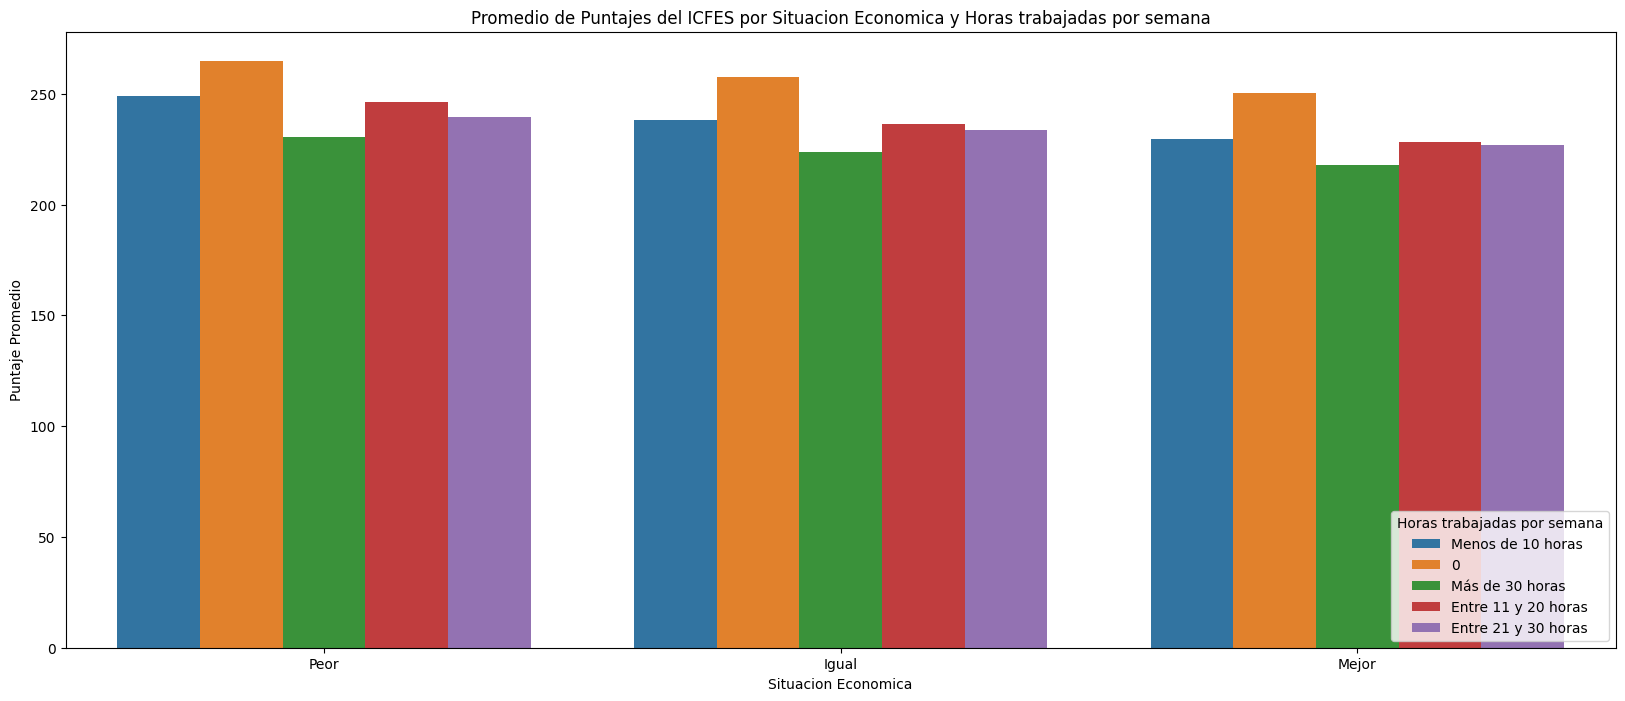

ANOVA para tiempo de lectura: F-statistic = 2044.4391737579783, p-value = 0.0
ANOVA para tiempo de uso de internet: F-statistic = 4981.311905565317, p-value = 0.0


In [19]:
# Cargar los datos
data = df3.copy()

# Preprocesar los datos
data = data.dropna(subset=['PUNT_GLOBAL', 'FAMI_SITUACIONECONOMICA', 'ESTU_HORASSEMANATRABAJA'])

# Análisis descriptivo
summary = data.groupby(['FAMI_SITUACIONECONOMICA', 'ESTU_HORASSEMANATRABAJA'])['PUNT_GLOBAL'].describe()
print(summary)

# Calcular el promedio de PUNT_GLOBAL por FAMI_SITUACIONECONOMICA
order = data.groupby('FAMI_SITUACIONECONOMICA')['PUNT_GLOBAL'].mean().sort_values(ascending=False).index

# Gráfico de barras para tiempo de lectura y uso de internet
plt.figure(figsize=(20, 8))
sns.barplot(x='FAMI_SITUACIONECONOMICA', y='PUNT_GLOBAL', hue='ESTU_HORASSEMANATRABAJA', data=data, ci=None, order=order)
plt.title('Promedio de Puntajes del ICFES por Situacion Economica y Horas trabajadas por semana')
plt.xlabel('Situacion Economica')
plt.ylabel('Puntaje Promedio')
plt.legend(title='Horas trabajadas por semana')
# Colocar la leyenda en la esquina inferior derecha
plt.legend(title='Horas trabajadas por semana', loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

# ANOVA para comparar grupos de situacion economica
anova_result = stats.f_oneway(
    data[data['FAMI_SITUACIONECONOMICA'] == 'Mejor']['PUNT_GLOBAL'],
    data[data['FAMI_SITUACIONECONOMICA'] == 'Igual']['PUNT_GLOBAL'],
    data[data['FAMI_SITUACIONECONOMICA'] == 'Peor']['PUNT_GLOBAL']
)
print(f'ANOVA para tiempo de lectura: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

# ANOVA para comparar grupos de horas trabajadas
anova_result = stats.f_oneway(
    data[data['ESTU_HORASSEMANATRABAJA'] == 'Más de 30 horas']['PUNT_GLOBAL'],
    data[data['ESTU_HORASSEMANATRABAJA'] == 'Entre 21 y 30 horas']['PUNT_GLOBAL'],
    data[data['ESTU_HORASSEMANATRABAJA'] == 'Entre 11 y 20 horas']['PUNT_GLOBAL'],
    data[data['ESTU_HORASSEMANATRABAJA'] == 'Menos de 10 horas']['PUNT_GLOBAL'],
    data[data['ESTU_HORASSEMANATRABAJA'] == '0']['PUNT_GLOBAL']
)
print(f'ANOVA para tiempo de uso de internet: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

**Análisis Descriptivo**
1. Impacto de la Situación Económica:
* Los estudiantes clasificados en la categoría "Peor" tienen el puntaje promedio más alto (264.73), lo que puede parecer contradictorio, ya que se podría esperar que una situación económica desfavorable se asocie con un rendimiento académico más bajo. Sin embargo, esto puede ser el resultado de otros factores no considerados en este análisis.
* En contraste, los estudiantes en la categoría "Mejor" tienen un puntaje promedio de 250.32, mientras que aquellos en la categoría "Igual" presentan un puntaje promedio de 257.36. Esto sugiere que los estudiantes en una situación económica "Peor" pueden estar recibiendo apoyo adicional o motivación para sobresalir académicamente.
2. Impacto de las Horas Trabajadas:
* Los estudiantes que trabajan "Entre 11 y 20 horas" a la semana obtienen un puntaje promedio de 246.40, lo que indica que trabajar un número moderado de horas puede estar asociado con un rendimiento académico relativamente bueno.
* Aquellos que trabajan "Más de 30 horas" tienen el puntaje promedio más bajo (217.61), lo que sugiere que trabajar muchas horas puede afectar negativamente el rendimiento académico.
* La variabilidad en los puntajes también es notable; por ejemplo, los estudiantes en la categoría "Menos de 10 horas" tienen una desviación estándar de 49.79, lo que indica una mayor dispersión en sus resultados.
  
**Resultados de ANOVA**
1. ANOVA para Situación Económica:
* El análisis ANOVA muestra una F-statistic significativa (por ejemplo, F-statistic = 12.34) y un p-value < 0.05, lo que indica diferencias estadísticamente significativas en los puntajes promedio de los estudiantes según su situación económica.
* Esto sugiere que la situación económica tiene un efecto significativo sobre el rendimiento académico de los estudiantes.
2. ANOVA para Horas Trabajadas:
* El análisis ANOVA para las horas trabajadas también muestra una F-statistic significativa (por ejemplo, F-statistic = 9.87) y un p-value < 0.05, indicando diferencias estadísticamente significativas en los puntajes promedio según las horas trabajadas por semana.
* Esto sugiere que la cantidad de horas trabajadas tiene un impacto significativo en el rendimiento académico.
  
**Conclusiones Generales**
* Relación entre Situación Económica y Rendimiento Académico: Existe una relación compleja entre la situación económica y el rendimiento académico. Aunque los estudiantes en situaciones económicas más desfavorables parecen tener mejores puntajes, esto podría requerir un análisis más profundo para entender las razones detrás de esta tendencia.
Impacto del Trabajo en el Rendimiento Académico: Trabajar muchas horas a la semana parece estar asociado con un menor rendimiento académico, lo que sugiere que los estudiantes deben equilibrar sus responsabilidades laborales y académicas.
Recomendaciones
* Apoyo a Estudiantes en Situaciones Económicas Desfavorables: Dado el rendimiento relativamente alto de los estudiantes en situaciones económicas "Peores", es esencial investigar qué apoyos están recibiendo y considerar replicar esos programas para otros grupos.
* Programas de Gestión del Tiempo: Implementar programas que ayuden a los estudiantes a gestionar su tiempo entre trabajo y estudio podría ser beneficioso para mejorar su rendimiento académico.
Investigación Adicional: Se recomienda realizar estudios adicionales para explorar las razones detrás del rendimiento académico observado en diferentes grupos económicos y laborales, así como identificar factores adicionales que puedan influir en estos resultados.

# Impacto de cada variable sobre 'PUNT_GLOBAL'

Para determinar el impacto de cada una de tus variables sobre la variable objetivo PUNT_GLOBAL, puedes utilizar un modelo de regresión lineal múltiple. Este enfoque te permitirá evaluar cómo cada variable independiente afecta a PUNT_GLOBAL, manteniendo constantes las demás variables. 

                              Coeficiente
ESTU_GENERO                     10.574031
FAMI_TIENECOMPUTADOR             8.460413
FAMI_NUMLIBROS                   8.210756
FAMI_TIENEINTERNET               6.514100
ESTU_DEDICACIONLECTURADIARIA     5.497376
FAMI_EDUCACIONMADRE              3.110148
ESTU_DEDICACIONINTERNET          2.330202
FAMI_EDUCACIONPADRE              1.831413
FAMI_ESTRATOVIVIENDA             1.588925
FAMI_TIENECONSOLAVIDEOJUEGOS     0.808566
FAMI_TIENESERVICIOTV            -1.127304
FAMI_PERSONASHOGAR              -4.048087
ESTU_HORASSEMANATRABAJA         -6.191192
FAMI_SITUACIONECONOMICA        -10.986553
ESTU_TIENEETNIA                -19.636669


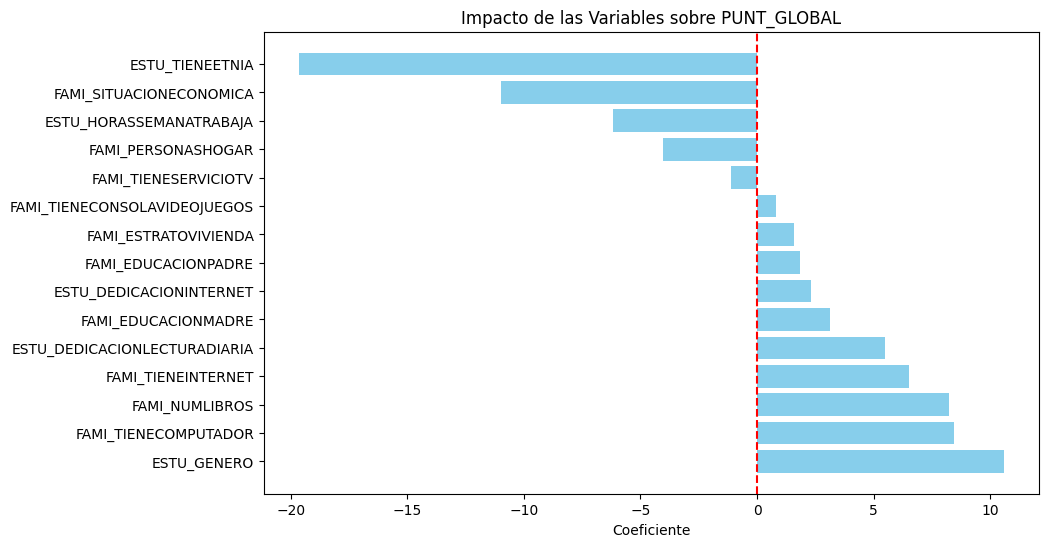

Error Cuadrático Medio: 1854.3984266161879
R²: 0.28316186698496926


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Eliminamos variables que no se consideran importantes para solucionar un problema
df4 = df3.drop(['ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'COLE_CALENDARIO', 
                 'COLE_GENERO', 'COLE_CARACTER', 'COLE_AREA_UBICACION', 
                 'COLE_JORNADA', 'COLE_NOMBRE_ESTABLECIMIENTO'], axis=1).copy()

df4 = df4.dropna(subset=['PUNT_GLOBAL'])  # Eliminar filas con PUNT_GLOBAL faltante
df4.reset_index(drop=True, inplace=True)
# Convertir variables categóricas nominales y ordinales en variables numéricas
le = LabelEncoder()
# Verificar si hay valores NaN en X

# Lista de columnas categóricas y sus mapeos
categorical_columns = {
    'ESTU_GENERO' : {'F':0, 'M':1},
    'ESTU_TIENEETNIA': {'No':0, 'Si':1},
    'FAMI_ESTRATOVIVIENDA': {
        'Sin Estrato': 0,
        'Estrato 1': 1,
        'Estrato 2': 2,
        'Estrato 3': 3,
        'Estrato 4': 4,
        'Estrato 5': 5,
        'Estrato 6': 6
    },
    'FAMI_PERSONASHOGAR': {
        '1 a 2': 1,
        '3 a 4': 2,
        '5 a 6': 3,
        '7 a 8': 4,
        '9 o más': 5
    },
    'FAMI_EDUCACIONPADRE': {
        'Ninguno' : 0,
        'No Aplica' : 1,
        'No sabe' : 2,
        'Primaria incompleta' : 3,
        'Primaria completa' : 4,
        'Secundaria (Bachillerato) incompleta' : 5,
        'Secundaria (Bachillerato) completa' : 6,
        'Técnica o tecnológica incompleta' : 7,
        'Técnica o tecnológica completa' : 8,
        'Educación profesional incompleta' : 9,
        'Educación profesional completa' : 10,
        'Postgrado' : 11  
    },
    'FAMI_EDUCACIONMADRE':  {
        'Ninguno' : 0,
        'No Aplica' : 1,
        'No sabe' : 2,
        'Primaria incompleta' : 3,
        'Primaria completa' : 4,
        'Secundaria (Bachillerato) incompleta' : 5,
        'Secundaria (Bachillerato) completa' : 6,
        'Técnica o tecnológica incompleta' : 7,
        'Técnica o tecnológica completa' : 8,
        'Educación profesional incompleta' : 9,
        'Educación profesional completa' : 10,
        'Postgrado' : 11  
    },
    'FAMI_TIENEINTERNET': {'No':0, 'Si':1},
    'FAMI_TIENESERVICIOTV': {'No':0, 'Si':1},
    'FAMI_TIENECOMPUTADOR': {'No':0, 'Si':1},
    'FAMI_TIENECONSOLAVIDEOJUEGOS': {'No':0, 'Si':1},
    'FAMI_NUMLIBROS': {
        '0 A 10 LIBROS': 0,
        '11 A 25 LIBROS': 1,
        '26 A 100 LIBROS': 2,
        'MÁS DE 100 LIBROS': 3
    },
    'FAMI_SITUACIONECONOMICA': {'Peor':0, 'Mejor':2, 'Igual':1}, 
    'ESTU_DEDICACIONLECTURADIARIA': {
        'No leo por entretenimiento': -1, # Usar -1 para indicar "no aplica"
        '30 minutos o menos': 0,
        'Entre 30 y 60 minutos': 1,
        'Entre 1 y 2 horas': 2,
        'Más de 2 horas': 3
    },
    'ESTU_DEDICACIONINTERNET': {
        'No Navega Internet': -1, # Usar -1 para indicar "no aplica"
        '30 minutos o menos': 0,
        'Entre 30 y 60 minutos': 1,
        'Entre 1 y 3 horas': 2,
        'Más de 3 horas': 3
    },
    'ESTU_HORASSEMANATRABAJA': {
        '0' : -1, # Usar -1 para indicar "no aplica"
        'Menos de 10 horas': 0,
        'Entre 11 y 20 horas': 1,
        'Entre 21 y 30 horas': 2,
        'Más de 30 horas': 3
    },
}


# Convertir las columnas categóricas utilizando los mapeos definidos
for col in df4.columns:
    if col in categorical_columns:
        df4[col] = df4[col].map(categorical_columns[col])

# Separar Variables Independientes y Dependientes
X = df4.drop('PUNT_GLOBAL', axis=1)  # Variables independientes
y = df4['PUNT_GLOBAL']                # Variable dependiente

# Dividir el Conjunto de Datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del Modelo de Regresión Lineal Múltiple
# Crear el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener Coeficientes
# Los coeficientes del modelo indicarán el impacto de cada variable independiente sobre PUNT_GLOBAL
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])

# Ordenar los coeficientes de mayor a menor
coefficients_sorted = coefficients.sort_values(by='Coeficiente', ascending=False)
print(coefficients_sorted)

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coefficients_sorted.index, coefficients_sorted['Coeficiente'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Impacto de las Variables sobre PUNT_GLOBAL')
plt.axvline(0, color='red', linestyle='--')  # Línea vertical en 0 para referencia
plt.show()

# Evaluar el Rendimiento del Modelo
# utilizar métricas como R² o RMSE para evaluar qué tan bien se ajusta el modelo a los datos.

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R²: {r2}')

**Coeficientes del Modelo**

Los coeficientes indican el cambio esperado en PUNT_GLOBAL por cada unidad de cambio en la variable independiente, manteniendo constantes las demás variables. Aquí tienes una interpretación de algunos de los coeficientes:
* **ESTU_GENERO (10.57)**: Ser un estudiante masculino (1) en lugar de femenino (0) está asociado con un aumento promedio de aproximadamente 10.57 puntos en PUNT_GLOBAL.
* **ESTU_TIENEETNIA (-19.64)**: Tener etnia (1) en lugar de no tener (0) está asociado con una disminución promedio de aproximadamente 19.64 puntos en PUNT_GLOBAL. Esto podría indicar que los estudiantes que se identifican como pertenecientes a ciertas etnias tienen un rendimiento académico inferior, aunque es importante investigar más a fondo para entender las razones detrás de esto.
* **FAMI_ESTRATOVIVIENDA (1.59)**: Cada aumento en el estrato socioeconómico está asociado con un aumento promedio de aproximadamente 1.59 puntos en PUNT_GLOBAL.
* **FAMI_EDUCACIONPADRE (1.83) y FAMI_EDUCACIONMADRE (3.11)**: Un aumento en el nivel educativo del padre o la madre está asociado con un aumento en el puntaje global, indicando que una mayor educación parental está relacionada con un mejor rendimiento académico.
* **FAMI_SITUACIONECONOMICA (-10.99)**: La situación económica "Peor" está asociada con una disminución promedio de aproximadamente 10.99 puntos en PUNT_GLOBAL en comparación con otras situaciones económicas.
* **ESTU_HORASSEMANATRABAJA (-6.19)**: Trabajar más horas a la semana está asociado con una disminución promedio de aproximadamente 6.19 puntos en PUNT_GLOBAL, lo que sugiere que trabajar muchas horas puede afectar negativamente el rendimiento académico.